# **Winter Analytics ‘25**
## Driving impactful sustainability insights through data-driven analysis and strategic recommendations.

### **Team: Data anal-ist**
### **Date: 08/02/25**
---

## **Introduction**
As an ESG consultant, our objective is to analyze a dataset containing **124 Sustainable Development Goal (SDG) indicators** for **217 countries**. The aim is to derive **actionable insights** that support global and regional efforts to achieve the **United Nations Sustainable Development Goals (SDGs) by 2030**.

Our approach includes:
- **Country Clustering**
- **Trend Analysis**
- **Indicator Performance Analysis**
- **Predictive Modeling**
- **India’s Sustainability Commitments Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Preprocessing and Cleaning**


In [ ]:
df=pd.read_excel(r"C:\Users\Ashutosh Gupta\Downloads\Dataset.xlsx")
df

,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,Afghanistan,AFG,Access to clean fuels and technologies for cooking (% of population),EG.CFT.ACCS.ZS,6.2,7.2,8.2,9.5,10.9,12.2,13.85,15.3,16.7,18.4,20,21.8,23,24.8,26.1,27.4
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,1.613591,4.074574,9.409158,14.738506,20.064968,25.390894,30.718691,36.05101,42.400002,46.740051,42.700001,43.222019,69.099998,68.290649,89.5,71.5
2,Afghanistan,AFG,"Access to electricity, rural (% of rural population)",EG.ELC.ACCS.RU.ZS,..,..,..,..,3.240604,11.113852,15.765366,22.060678,27.95425,34.745785,30.2188,29.57288,60.849155,60.566135,86.500511,64.573357
3,Afghanistan,AFG,"Access to electricity, urban (% of urban population)",EG.ELC.ACCS.UR.ZS,72.133469,73.599037,75.063278,76.533134,78.015556,74,81.04377,82.59082,89.900002,85.724472,82.800003,86.56778,95,92.259048,98.699997,92.5
4,Afghanistan,AFG,Adjusted savings: natural resources depletion (% of GNI),NY.ADJ.DRES.GN.ZS,..,..,..,..,..,..,..,..,..,0.265019,0.354491,0.397697,0.386704,0.289482,0.288231,0.295242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26907,Zimbabwe,ZWE,Women Business and the Law Index Score (scale 1-100),SG.LAW.INDX,70,70,75.625,75.625,75.625,75.625,84.375,86.875,86.875,86.875,86.875,86.875,86.875,86.875,86.875,86.875
26908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop(['Series Code'],axis=1,inplace=True)

In [ ]:
df.columns=['Country Name','Country Code','Indicators','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

In [ ]:
df.drop([26907,26908,26909,26910,26911],inplace=True) #Unnecessary lines in data

In [ ]:
df.head()

,Country Name,Country Code,Indicators,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,AFG,Access to clean fuels and technologies for cooking (% of population),6.2,7.2,8.2,9.5,10.9,12.2,13.85,15.3,16.7,18.4,20,21.8,23,24.8,26.1,27.4
1,Afghanistan,AFG,Access to electricity (% of population),1.613591,4.074574,9.409158,14.738506,20.064968,25.390894,30.718691,36.05101,42.400002,46.740051,42.700001,43.222019,69.099998,68.290649,89.5,71.5
2,Afghanistan,AFG,"Access to electricity, rural (% of rural population)",..,..,..,..,3.240604,11.113852,15.765366,22.060678,27.95425,34.745785,30.2188,29.57288,60.849155,60.566135,86.500511,64.573357
3,Afghanistan,AFG,"Access to electricity, urban (% of urban population)",72.133469,73.599037,75.063278,76.533134,78.015556,74,81.04377,82.59082,89.900002,85.724472,82.800003,86.56778,95,92.259048,98.699997,92.5
4,Afghanistan,AFG,Adjusted savings: natural resources depletion (% of GNI),..,..,..,..,..,..,..,..,..,0.265019,0.354491,0.397697,0.386704,0.289482,0.288231,0.295242


In [ ]:
numeric_cols = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce') #Converting the numeric data type to float.

In [ ]:
df.isna().sum()

Country Name        0
Country Code        0
Indicators          0
2000            10277
2001            11342
2002            11178
2003            11273
2004            10842
2005            10137
2006            10598
2007            10721
2008            10560
2009            11100
2010             9777
2011            10562
2012            10458
2013            10501
2014            10118
2015            11056
dtype: int64

In [ ]:
df_raw=df.copy()

In [ ]:
df=df[df.isnull().sum(axis=1)<9] #Removed all the indicators which did'nt had YOY values for more than or equal to 9 years
df

,Country Name,Country Code,Indicators,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,AFG,Access to clean fuels and technologies for cooking (% of population),6.200000,7.200000,8.200000,9.500000,10.900000,12.200000,13.850000,15.300000,16.700000,18.400000,20.000000,21.800000,23.000000,24.800000,26.100000,27.400000
1,Afghanistan,AFG,Access to electricity (% of population),1.613591,4.074574,9.409158,14.738506,20.064968,25.390894,30.718691,36.051010,42.400002,46.740051,42.700001,43.222019,69.099998,68.290649,89.500000,71.500000
2,Afghanistan,AFG,"Access to electricity, rural (% of rural population)",NaN,NaN,NaN,NaN,3.240604,11.113852,15.765366,22.060678,27.954250,34.745785,30.218800,29.572880,60.849155,60.566135,86.500511,64.573357
3,Afghanistan,AFG,"Access to electricity, urban (% of urban population)",72.133469,73.599037,75.063278,76.533134,78.015556,74.000000,81.043770,82.590820,89.900002,85.724472,82.800003,86.567780,95.000000,92.259048,98.699997,92.500000
7,Afghanistan,AFG,Age dependency ratio (% of working-age population),108.346635,108.989886,109.347157,109.447532,109.286820,107.964605,106.326191,108.338125,109.240379,106.845774,105.433416,102.585972,99.300360,97.125534,94.706697,93.042448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,Zimbabwe,ZWE,Total fisheries production (metric tons),15265.000000,14585.000000,13763.000000,13250.000000,13505.000000,12922.000000,13000.000000,13050.000000,13152.000000,13202.000000,13982.000000,19582.000000,20741.000000,27077.000000,31598.000000,34490.870000
26902,Zimbabwe,ZWE,"Unemployment, female (% of female labor force) (modeled ILO estimate)",4.622000,4.595000,4.599000,4.587000,4.525000,4.743000,4.955000,5.173000,5.429000,5.565000,5.758000,5.988000,5.695000,5.451000,5.166000,5.177000
26903,Zimbabwe,ZWE,"Unemployment, total (% of total labor force) (modeled ILO estimate)",5.688000,5.355000,5.062000,4.750000,4.390000,4.538000,4.681000,4.829000,5.014000,5.083000,5.209000,5.370000,5.153000,4.982000,4.770000,4.778000
26905,Zimbabwe,ZWE,Urban population (% of total population),33.758000,34.170000,34.585000,34.479000,34.294000,34.110000,33.926000,33.743000,33.560000,33.378000,33.196000,33.015000,32.834000,32.654000,32.504000,32.385000


In [ ]:
df['Indicators'].unique().tolist()

['Access to clean fuels and technologies for cooking (% of population)',
 'Access to electricity (% of population)',
 'Access to electricity, rural (% of rural population)',
 'Access to electricity, urban (% of urban population)',
 'Age dependency ratio (% of working-age population)',
 'Agricultural land (% of land area)',
 'Agricultural methane emissions (% of total)',
 'Agricultural nitrous oxide emissions (% of total)',
 'Agriculture, forestry, and fishing, value added (% of GDP)',
 'Annual freshwater withdrawals, total (% of internal resources)',
 'Average precipitation in depth (mm per year)',
 'Births attended by skilled health staff (% of total)',
 'Capture fisheries production (metric tons)',
 'CO2 emissions (kt)',
 'CO2 emissions (metric tons per capita)',
 'Contraceptive prevalence, any method (% of married women ages 15-49)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Fertility rate, total (births per woman)',
 'Food production index (2014-2016 = 100)'

## **Grouping Indicators Based on Similarity for NAN Value Imputation**
#**Health & Education**  


In [ ]:
health = [
  "Births attended by skilled health staff (% of total)",
    "Contraceptive prevalence, any method (% of married women ages 15-49)",
    "Fertility rate, total (births per woman)",
    "Food production index (2014-2016 = 100)",
    "Incidence of HIV, all (per 1,000 uninfected population)",
    "Incidence of tuberculosis (per 100,000 people)",
    "Life expectancy at birth, total (years)",
    "Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)",
    "Mortality rate, adult, male (per 1,000 male adults)",
    "Mortality rate, under-5 (per 1,000 live births)",
    "Number of infant deaths",
    "Number of maternal deaths",
    "Number of neonatal deaths",
    "People practicing open defecation (% of population)",
    "People using at least basic drinking water services, urban (% of urban population)",
    "People using safely managed drinking water services (% of population)",
    "People using safely managed drinking water services, rural (% of rural population)",
    "People with basic handwashing facilities including soap and water, rural (% of rural population)",
    "Prevalence of undernourishment (% of population)",
    "Prevalence of overweight, weight for height (% of children under 5)",
    "Prevalence of underweight, weight for age (% of children under 5)",
    "Unmet need for contraception (% of married women ages 15-49)",
    "Low-birthweight babies (% of births)",
    "People using safely managed sanitation services (% of population)",
    "Population living in slums (% of urban population)",
    "Diarrhea treatment (% of children under 5 who received ORS packet)",
    "Community health workers (per 1,000 people)"
]

# Extracting only year columns
year_columns = [col for col in df.columns if isinstance(col, (int, str)) and str(col).isdigit()]
df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')

#Apply Rollinging Mean for Health & Education Indicators
df_rolled = (
    df.loc[df["Indicators"].isin(health), year_columns]
    .groupby(df["Country Name"])  # Ensures group-wise operation
    .apply(lambda x: x.rolling(3, min_periods=1, axis=1).mean())
)

# Reassigning values carefully to avoid shape issues
df.loc[df["Indicators"].isin(health), year_columns] = df_rolled.values

# Filling Remaining NaN Values (Necessary cause the missing values are more than 3)
df[year_columns] = df[year_columns].bfill(axis=1).ffill(axis=1)

C:\Users\Ashutosh Gupta\AppData\Local\Temp\ipykernel_28640\1523133509.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')
C:\Users\Ashutosh Gupta\AppData\Local\Temp\ipykernel_28640\1523133509.py:39: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  .apply(lambda x: x.rolling(3, min_periods=1, axis=1).mean())
C:\Users\Ashutosh Gupta\AppData\Local\Temp\ipykernel_28640\1523133509.py:39: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  .apply(lambda x: x.rolling(3, min_periods=1, axis=1).mean(

In [ ]:
#Ensuring all NaN values related to above indicators are removed.
df.loc[df['Indicators'].isin(health),year_columns].isna().sum()


2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
dtype: int64

#**Economy & Trade**

In [ ]:

econ_trade = [
    "GDP growth (annual %)",
    "Government expenditure on education, total (% of government expenditure)",
    "Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)",
    "Labor force, total",
    "Proportion of seats held by women in national parliaments (%)",
    "Ratio of female to male labor force participation rate (%) (modeled ILO estimate)",
    "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "Women Business and the Law Index Score (scale 1-100)",
    "Gini index",
    "Income share held by lowest 20%",
    "Poverty headcount ratio at national poverty lines (% of population)"]

#Extracting only year columns
year_columns = [col for col in df.columns if isinstance(col, (int, str)) and str(col).isdigit()]

# Step 2: Convert all year columns to numeric (ensures valid input for rolling mean)
df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')

#Applying forward & backward fill for Economy and trade Indicators
df_fill = (
    df.loc[df["Indicators"].isin(econ_trade), year_columns]
    .groupby(df["Country Name"])  # Ensures group-wise operation
    .apply(lambda x: x.set_index(pd.to_datetime(x.index, errors='coerce'))
                      .interpolate(method="time")
                      .fillna(method="bfill"))
)

#Reassigning values carefully to avoid shape issues
df.loc[df["Indicators"].isin(econ_trade), year_columns] = df_fill.values


C:\Users\Ashutosh Gupta\AppData\Local\Temp\ipykernel_28640\414354323.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')
C:\Users\Ashutosh Gupta\AppData\Local\Temp\ipykernel_28640\414354323.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method="bfill"))
C:\Users\Ashutosh Gupta\AppData\Local\Temp\ipykernel_28640\414354323.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method="bfill"))
C:\Users\Ashutosh Gupta\AppData\Local\Temp\ipykernel_28640\414354323.py:27: Future

In [ ]:
#Ensuring all NaN values related to above indicators are removed.
df.loc[df['Indicators'].isin(econ_trade),year_columns].isna().sum()

2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
dtype: int64

#**Infrastructure & Energy**

In [ ]:
# Infrastructure & Energy
infra_energy = [
    "Access to clean fuels and technologies for cooking (% of population)",
    "Access to electricity (% of population)",
    "Access to electricity, rural (% of rural population)",
    "Access to electricity, urban (% of urban population)",
    "Hospital beds (per 1,000 people)",
    "Physicians (per 1,000 people)",
    "Electric power consumption (kWh per capita)",
    "Electricity production from coal sources (% of total)",
    "Electricity production from hydroelectric sources (% of total)",
    "Electricity production from natural gas sources (% of total)",
    "Electricity production from oil sources (% of total)",
    "Electricity production from renewable sources, excluding hydroelectric (% of total)",
    "Electricity production from renewable sources, excluding hydroelectric (% of total)",
    "Energy-related methane emissions",
    "Energy use",
    "Total fisheries production (metric tons)"
]

# Extracting only year columns
year_columns = [col for col in df.columns if isinstance(col, (int, str)) and str(col).isdigit()]
df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')

# Step 3: Apply polyonomial method for Infra & Energy Indicators
df_rolled = (
    df.loc[df["Indicators"].isin(infra_energy), year_columns]
    .groupby(df["Country Name"])  # Ensures group-wise operation
    .apply(lambda x: x.interpolate(method='polynomial', order=2))
)

#Reassigning values carefully to avoid shape issues
df.loc[df["Indicators"].isin(infra_energy), year_columns] = df_rolled.values  # Using .values ensures shape consistency

C:\Users\Ashutosh Gupta\AppData\Local\Temp\ipykernel_28640\4061563864.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')


In [ ]:
#Ensuring all NaN values related to above indicators are removed.
df.loc[df['Indicators'].isin(infra_energy),year_columns].isna().sum()

2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
dtype: int64

#**Environment & Natural Resources**

In [ ]:
env_natural = [
"Agricultural land (% of land area)",
    "Agricultural methane emissions (% of total)",
    "Agricultural nitrous oxide emissions (% of total)",
    "Agriculture, forestry, and fishing, value added (% of GDP)",
    "Annual freshwater withdrawals, total (% of internal resources)",
    "Average precipitation in depth (mm per year)",
    "CO2 emissions (kt)",
    "CO2 emissions (metric tons per capita)",
    "CO2 emissions from electricity and heat production, total (% of total fuel combustion)",
    "CO2 emissions from manufacturing industries and construction (% of total fuel combustion)",
    "CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)",
    "CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)",
    "CO2 emissions from transport (% of total fuel combustion)",
    "Energy intensity level of primary energy (MJ/$2017 PPP GDP)",
    "Energy related methane emissions (% of total)",
    "Energy imports, net (% of energy use)",
    "Energy use (kg of oil equivalent per capita)",
    "Fossil fuel energy consumption (% of total)",
    "Methane emissions in energy sector (thousand metric tons of CO2 equivalent)",
    "Nitrous oxide emissions (thousand metric tons of CO2 equivalent)",
    "Renewable electricity output (% of total electricity output)",
    "Renewable energy consumption (% of total final energy consumption)",
    "Renewable internal freshwater resources per capita (cubic meters)",
    "Alternative and nuclear energy (% of total energy use)",
    "Level of water stress: freshwater withdrawal as a proportion of available freshwater resources",
    "Adjusted savings: natural resources depletion (% of GNI)",
    "Adjusted savings: net forest depletion (% of GNI)"
]
#Extracting only year columns
year_columns = [col for col in df.columns if isinstance(col, (int, str)) and str(col).isdigit()]
df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')

#Applying fwd/bwd fill for Environment & Natural Indicators
df_rolled = (
    df.loc[df["Indicators"].isin(env_natural), year_columns]
    .groupby(df["Country Name"])  # Ensures group-wise operation
    .apply(lambda x: x.interpolate(method='linear')).fillna(method='bfill')
)

#Reassigning values carefully to avoid shape issues
df.loc[df["Indicators"].isin(env_natural), year_columns] = df_rolled.values  # Using .values ensures shape consistency


C:\Users\Ashutosh Gupta\AppData\Local\Temp\ipykernel_28640\3733297240.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')
C:\Users\Ashutosh Gupta\AppData\Local\Temp\ipykernel_28640\3733297240.py:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .apply(lambda x: x.interpolate(method='linear')).fillna(method='bfill')


In [ ]:
#Ensuring all NaN values related to above indicators are removed.
df.loc[df['Indicators'].isin(env_natural),year_columns].isna().sum()

2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
dtype: int64

#**Education**

In [ ]:
edu = [
"Pupil-teacher ratio, primary",
    "Pupil-teacher ratio, secondary",
    "School enrollment, primary (% gross)",
    "School enrollment, primary (gross), gender parity index (GPI)",
    "School enrollment, secondary (% gross)",
    "School enrollment, tertiary (% gross)",
    "Literacy rate, adult female (% of females ages 15 and above)",
    "Literacy rate, adult male (% of males ages 15 and above)",
    "Literacy rate, adult total (% of people ages 15 and above)",
    "Research and development expenditure (% of GDP)",
    "School enrollment, secondary, female (% net)",
    "Trained teachers in secondary education, male (% of male teachers)",
    "Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)",
    "Share of youth not in education, employment or training, female (% of female youth population)",
    "Scientific and technical journal articles",
    "Patent applications, residents",
    "Children out of school (% of primary school age)",
    "Adolescents out of school (% of lower secondary school age)"
]

# Extracting only year columns
year_columns = [col for col in df.columns if isinstance(col, (int, str)) and str(col).isdigit()]
df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')

#Applying Rolling Mean for Education Indicators
df_rolled = (
    df.loc[df["Indicators"].isin(edu), year_columns]
    .groupby(df["Country Name"])  # Ensures group-wise operation
    .apply(lambda x: x.rolling(3, min_periods=1, axis=1).mean())
)

# Reassigning values carefully to avoid shape issues
df.loc[df["Indicators"].isin(edu), year_columns] = df_rolled.values  # Using .values ensures shape consistency

# Filling Remaining NaN Values (necessary since missing values are more than 3 which)
df[year_columns] = df[year_columns].bfill(axis=1).ffill(axis=1)  # Fill backward, then forward


C:\Users\Ashutosh Gupta\AppData\Local\Temp\ipykernel_28640\672202451.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')
C:\Users\Ashutosh Gupta\AppData\Local\Temp\ipykernel_28640\672202451.py:30: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  .apply(lambda x: x.rolling(3, min_periods=1, axis=1).mean())
C:\Users\Ashutosh Gupta\AppData\Local\Temp\ipykernel_28640\672202451.py:30: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  .apply(lambda x: x.rolling(3, min_periods=1, axis=1).mean())


In [ ]:
#Ensuring all NaN values related to above indicators are removed.
df.loc[df['Indicators'].isin(edu),year_columns].isna().sum()

2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
dtype: int64

#**Population & Demographics**

In [ ]:
pop_demo = [
    "Population ages 65 and above (% of total population)",
    "Population density (people per sq. km of land area)",
    "Population, female",
    "Population, total",
    "Rural population (% of total population)",
    "Urban population (% of total population)",
    "Children in employment, total (% of children ages 7-14)",
    "Children out of school (% of primary school age)",
    "Adolescents out of school (% of lower secondary school age)",
    "Vitamin A supplementation coverage rate (% of children ages 6-59 months)"
]
# Extracting only year columns
year_columns = [col for col in df.columns if isinstance(col, (int, str)) and str(col).isdigit()]
df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')

#Applying linear method for population & demographics Indicators
df_rolled = (
    df.loc[df["Indicators"].isin(pop_demo), year_columns]
    .groupby(df["Country Name"])  # Ensures group-wise operation
    .apply(lambda x: x.interpolate(method='linear')).fillna(method='bfill')
)

#Reassigning values carefully to avoid shape issues
df.loc[df["Indicators"].isin(pop_demo), year_columns] = df_rolled.values  # Using .values ensures shape consistency


C:\Users\Ashutosh Gupta\AppData\Local\Temp\ipykernel_28640\1911893440.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')
C:\Users\Ashutosh Gupta\AppData\Local\Temp\ipykernel_28640\1911893440.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .apply(lambda x: x.interpolate(method='linear')).fillna(method='bfill')


In [ ]:
#Ensuring all NaN values related to above indicators are removed.
df.loc[df['Indicators'].isin(pop_demo),year_columns].isna().sum()

2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
dtype: int64

**Now df is clean :**

In [ ]:
df.isna().sum()

Country Name    0
Country Code    0
Indicators      0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
dtype: int64

In [ ]:
#(Total Countries,Total Indicators)
len(df['Country Name'].unique()),len(df['Indicators'].unique())

(217, 112)

### Pivoting the Dataset for Clustering  

To facilitate clustering, we need to pivot the dataset into a structured format that enhances pattern recognition.  


In [ ]:
df_pivot = df.pivot(index=['Country Name', 'Country Code'], columns='Indicators', values=['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])
df_pivot.columns = ['_'.join(map(str, col)) for col in df_pivot.columns]  # Flatten multi-index
df_pivot.reset_index(inplace=True)
df_pivot

,Country Name,Country Code,2000_Access to clean fuels and technologies for cooking (% of population),2000_Access to electricity (% of population),"2000_Access to electricity, rural (% of rural population)","2000_Access to electricity, urban (% of urban population)",2000_Adjusted savings: natural resources depletion (% of GNI),2000_Adjusted savings: net forest depletion (% of GNI),2000_Adolescents out of school (% of lower secondary school age),2000_Age dependency ratio (% of working-age population),...,"2015_Share of youth not in education, employment or training, female (% of female youth population)",2015_Total fisheries production (metric tons),"2015_Trained teachers in lower secondary education, male (% of male teachers)","2015_Trained teachers in secondary education, male (% of male teachers)","2015_Unemployment, female (% of female labor force) (modeled ILO estimate)","2015_Unemployment, total (% of total labor force) (modeled ILO estimate)",2015_Unmet need for contraception (% of married women ages 15-49),2015_Urban population (% of total population),2015_Vitamin A supplementation coverage rate (% of children ages 6-59 months),2015_Women Business and the Law Index Score (scale 1-100)
0,Afghanistan,AFG,6.2,1.613591,3.240604,72.133469,NaN,NaN,NaN,108.346635,...,NaN,7200.00,NaN,NaN,14.094000,11.127000,NaN,24.803,98.0,28.750
1,Albania,ALB,38.2,100.000000,100.000000,100.000000,0.415801,0.122940,NaN,59.657295,...,31.990001,11550.10,NaN,NaN,17.114000,17.190001,NaN,57.434,NaN,85.625
2,Algeria,DZA,97.1,98.973099,98.268158,99.444649,16.876492,0.000000,NaN,61.500880,...,NaN,97131.18,NaN,NaN,16.566999,11.210000,NaN,70.848,NaN,55.000
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.473619,...,NaN,4377.95,NaN,NaN,NaN,NaN,NaN,87.238,NaN,NaN
4,Andorra,AND,100.0,100.000000,100.000000,100.000000,NaN,NaN,NaN,38.879667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.345,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,NaN,100.000000,100.000000,100.000000,NaN,NaN,NaN,53.283199,...,NaN,469.51,NaN,NaN,13.897000,12.617000,NaN,95.350,NaN,NaN
213,West Bank and Gaza,PSE,NaN,99.699997,99.186508,99.900002,NaN,NaN,17.023149,99.655302,...,37.763334,3483.00,100.0,100.0,34.298000,23.000000,NaN,75.368,NaN,26.250
214,"Yemen, Rep.",YEM,55.7,49.187256,33.932995,92.006851,29.846964,0.024413,NaN,108.441683,...,NaN,177408.00,NaN,NaN,26.426001,13.770000,NaN,34.777,8.0,26.875
215,Zambia,ZMB,13.8,16.700001,2.074172,44.099998,9.147099,8.835550,NaN,102.618954,...,NaN,112818.00,NaN,NaN,10.772000,10.125000,NaN,41.907,93.0,63.125


### Reason for NaN Values  

The NaN values appear because we previously dropped indicators that lacked Year-over-Year (YOY) data for more than nine years.  


**SOLUTION:**

In [ ]:
#Getting rid of indicators which are not it 60% of the countries (therefore not important for the dataset)

#Counting all non-null values for each indicator
indicator_counts = df_pivot.notna().sum(axis=0)

#Setting a threshold (60%)
country_threshold = df_pivot.shape[0] * 0.6 # 60% of total countries
valid_indicators = indicator_counts[indicator_counts >= country_threshold].index
df_filtered = df_pivot[valid_indicators]

In [ ]:
#Getting rid of countries which do not have data on 60% of the indicators (therefore not important for the dataset)

threshold = 0.6 * df_filtered.shape[1]  # 60% of the total indicators
df_filtered = df_filtered.dropna(thresh=threshold, axis=0)  # Drop countries with < 60% indicators

In [ ]:
df_filtered

,Country Name,Country Code,2000_Access to clean fuels and technologies for cooking (% of population),2000_Access to electricity (% of population),"2000_Access to electricity, rural (% of rural population)","2000_Access to electricity, urban (% of urban population)",2000_Adjusted savings: natural resources depletion (% of GNI),2000_Adjusted savings: net forest depletion (% of GNI),2000_Age dependency ratio (% of working-age population),2000_Agricultural land (% of land area),...,"2015_School enrollment, primary (% gross)","2015_School enrollment, primary (gross), gender parity index (GPI)","2015_School enrollment, secondary (% gross)","2015_School enrollment, tertiary (% gross)",2015_Scientific and technical journal articles,2015_Total fisheries production (metric tons),"2015_Unemployment, female (% of female labor force) (modeled ILO estimate)","2015_Unemployment, total (% of total labor force) (modeled ILO estimate)",2015_Urban population (% of total population),2015_Women Business and the Law Index Score (scale 1-100)
0,Afghanistan,AFG,6.2,1.613591,3.240604,72.133469,NaN,NaN,108.346635,57.882955,...,104.650887,0.693973,52.609327,NaN,28.233333,7200.00,14.094000,11.127000,24.803,28.750
1,Albania,ALB,38.2,100.000000,100.000000,100.000000,0.415801,0.122940,59.657295,41.751825,...,103.211642,1.030110,97.109810,64.141673,173.613333,11550.10,17.114000,17.190001,57.434,85.625
2,Algeria,DZA,97.1,98.973099,98.268158,99.444649,16.876492,0.000000,61.500880,16.803261,...,117.973323,0.950557,99.614349,35.051376,3763.700000,97131.18,16.566999,11.210000,70.848,55.000
5,Angola,AGO,41.1,24.212744,3.536051,44.817604,47.038581,1.756023,95.575412,37.668557,...,NaN,NaN,NaN,8.546737,29.640000,496104.00,7.781000,7.392000,63.446,70.625
6,Antigua and Barbuda,ATG,100.0,97.689262,96.595482,100.000000,NaN,NaN,53.975874,20.454545,...,105.698051,0.959521,107.396833,NaN,2.656667,3185.00,NaN,NaN,25.000,66.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Vietnam,VNM,14.0,87.828415,84.204430,99.072678,5.513881,0.000000,60.189042,28.226066,...,109.542506,0.995510,NaN,28.326916,2070.040000,6336087.61,1.709000,1.850000,33.809,76.250
213,West Bank and Gaza,PSE,NaN,99.699997,99.186508,99.900002,NaN,NaN,99.655302,82.890365,...,97.227051,0.999250,84.746183,45.298640,230.606667,3483.00,34.298000,23.000000,75.368,26.250
214,"Yemen, Rep.",YEM,55.7,49.187256,33.932995,92.006851,29.846964,0.024413,108.441683,44.830199,...,98.173103,0.838830,49.277260,10.151920,121.996667,177408.00,26.426001,13.770000,34.777,26.875
215,Zambia,ZMB,13.8,16.700001,2.074172,44.099998,9.147099,8.835550,102.618954,30.264061,...,102.835381,1.003327,NaN,NaN,137.053333,112818.00,10.772000,10.125000,41.907,63.125


### Handling Remaining NaN Values  

Initially, we avoided filling NaN values for one country based on data from other countries. However, since some NaN values still persist, we can use the KNN Imputer. This method operates on the principle of similarity, providing estimates that closely align with real-world values.  


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
# Separateing non-numeric columns
non_numeric_cols = ['Country Name', 'Country Code']
numeric_df = df_filtered.drop(columns=non_numeric_cols)

# aScaling the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Applying KNN Imputation
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(scaled_data)

# Converting back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=numeric_df.columns)

# Reverse scaling to original values
imputed_df = pd.DataFrame(scaler.inverse_transform(imputed_df), columns=numeric_df.columns)

# *Inserting non-numeric columns again*
imputed_df.insert(0, 'Country Name', df_filtered['Country Name'].values)
imputed_df.insert(1, 'Country Code', df_filtered['Country Code'].values)

In [ ]:
imputed_df #NOW THE DATA IS READY FOR PRE-PROCESSING

,Country Name,Country Code,2000_Access to clean fuels and technologies for cooking (% of population),2000_Access to electricity (% of population),"2000_Access to electricity, rural (% of rural population)","2000_Access to electricity, urban (% of urban population)",2000_Adjusted savings: natural resources depletion (% of GNI),2000_Adjusted savings: net forest depletion (% of GNI),2000_Age dependency ratio (% of working-age population),2000_Agricultural land (% of land area),...,"2015_School enrollment, primary (% gross)","2015_School enrollment, primary (gross), gender parity index (GPI)","2015_School enrollment, secondary (% gross)","2015_School enrollment, tertiary (% gross)",2015_Scientific and technical journal articles,2015_Total fisheries production (metric tons),"2015_Unemployment, female (% of female labor force) (modeled ILO estimate)","2015_Unemployment, total (% of total labor force) (modeled ILO estimate)",2015_Urban population (% of total population),2015_Women Business and the Law Index Score (scale 1-100)
0,Afghanistan,AFG,6.20,1.613591,3.240604,72.133469,7.305190,0.851202,108.346635,57.882955,...,104.650887,0.693973,52.609327,11.309842,28.233333,7200.00,14.094000,11.127000,24.803,28.750
1,Albania,ALB,38.20,100.000000,100.000000,100.000000,0.415801,0.122940,59.657295,41.751825,...,103.211642,1.030110,97.109810,64.141673,173.613333,11550.10,17.114000,17.190001,57.434,85.625
2,Algeria,DZA,97.10,98.973099,98.268158,99.444649,16.876492,0.000000,61.500880,16.803261,...,117.973323,0.950557,99.614349,35.051376,3763.700000,97131.18,16.566999,11.210000,70.848,55.000
3,Angola,AGO,41.10,24.212744,3.536051,44.817604,47.038581,1.756023,95.575412,37.668557,...,119.483235,0.958097,43.185250,8.546737,29.640000,496104.00,7.781000,7.392000,63.446,70.625
4,Antigua and Barbuda,ATG,100.00,97.689262,96.595482,100.000000,0.083840,0.007114,53.975874,20.454545,...,105.698051,0.959521,107.396833,48.610726,2.656667,3185.00,12.736000,11.922200,25.000,66.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Vietnam,VNM,14.00,87.828415,84.204430,99.072678,5.513881,0.000000,60.189042,28.226066,...,109.542506,0.995510,94.590547,28.326916,2070.040000,6336087.61,1.709000,1.850000,33.809,76.250
179,West Bank and Gaza,PSE,95.14,99.699997,99.186508,99.900002,4.020158,0.023968,99.655302,82.890365,...,97.227051,0.999250,84.746183,45.298640,230.606667,3483.00,34.298000,23.000000,75.368,26.250
180,"Yemen, Rep.",YEM,55.70,49.187256,33.932995,92.006851,29.846964,0.024413,108.441683,44.830199,...,98.173103,0.838830,49.277260,10.151920,121.996667,177408.00,26.426001,13.770000,34.777,26.875
181,Zambia,ZMB,13.80,16.700001,2.074172,44.099998,9.147099,8.835550,102.618954,30.264061,...,102.835381,1.003327,41.329706,5.318531,137.053333,112818.00,10.772000,10.125000,41.907,63.125


### Extracting Data for 2005 and 2015  

We will separately extract data for the years 2005 and 2015 to form clusters for each year.  


In [ ]:
df_2005=imputed_df[imputed_df.columns[402:482]]
df_2015=imputed_df[imputed_df.columns[1202:1282]]
df_2005.insert(0, 'Country Name', df_filtered['Country Name'].values)
df_2005.insert(1, 'Country Code', df_filtered['Country Code'].values)
df_2015.insert(0, 'Country Name', df_filtered['Country Name'].values)
df_2015.insert(1, 'Country Code', df_filtered['Country Code'].values)

In [ ]:
df_2005_num=df_2005.drop(['Country Name','Country Code'],axis=1)
df_2015_num=df_2015.drop(['Country Name','Country Code'],axis=1)

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_2005_num)
df_2005_scaled = pd.DataFrame(scaled_features, columns=df_2005_num.columns)

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_2015_num)
df_2015_scaled = pd.DataFrame(scaled_features, columns=df_2015_num.columns)

In [ ]:
# Reducing dimensions while retaining 95% variance
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca_data_2005 = pca.fit_transform(df_2005_scaled)

#Indicators retained
print(f'Number of PCA components: {pca.n_components_}')

Number of PCA components: 37


In [ ]:
# Reducing dimensions while retaining 95% variance
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca_data_2015 = pca.fit_transform(df_2015_scaled)

#Indicators retained
print(f'Number of PCA components: {pca.n_components_}')

Number of PCA components: 38


## **Clustering for 2005**  


**Using Elbow method and Silhouette to predict k value**

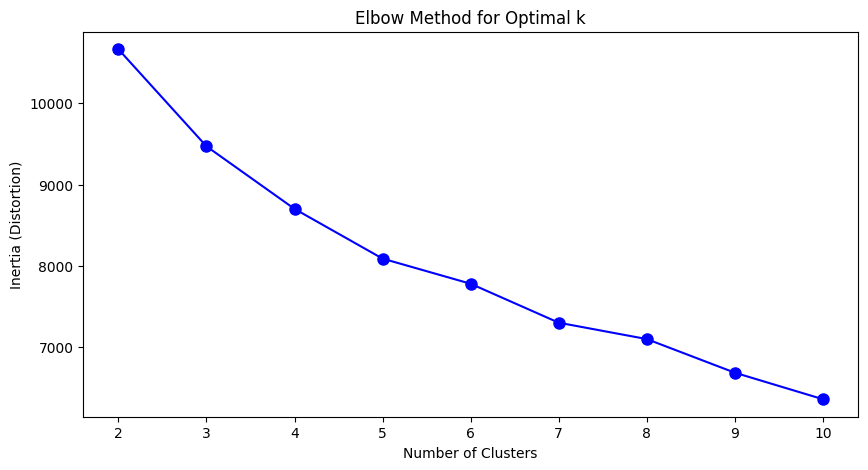

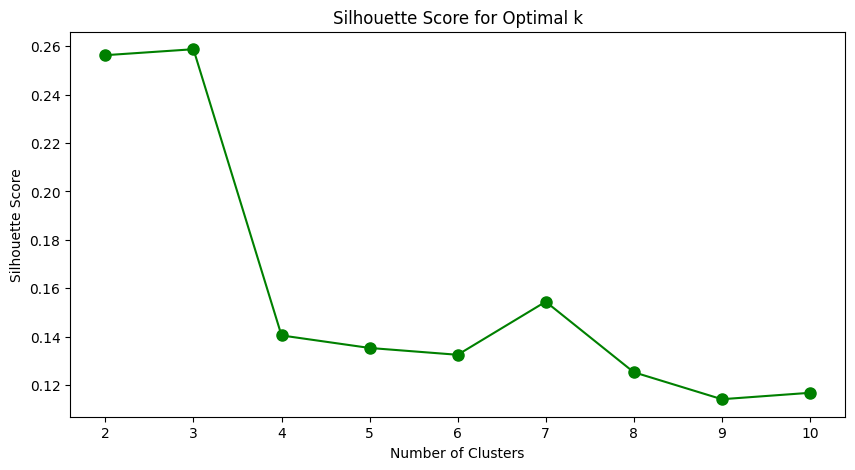

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

distortions = []
silhouette_scores = []

K = range(2, 11)  #k starts from at least 2

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pca_data_2005)  #

    distortions.append(kmeans.inertia_)  # Sum of squared distances
    silhouette_scores.append(silhouette_score(pca_data_2005, labels))

# Ploting Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K, distortions, 'bo-', markersize=8)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Distortion)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Ploting Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, 'go-', markersize=8)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


**K=3 IS OPTIMAL FOR ABOVE CLUSTERING**

In [ ]:
optimal_k = 3 #
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_data_2005)
df_2005['Cluster'] = clusters

C:\Users\Ashutosh Gupta\AppData\Local\Temp\ipykernel_28640\542228184.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2005['Cluster'] = clusters


 **PLOTTING CLUSTER**

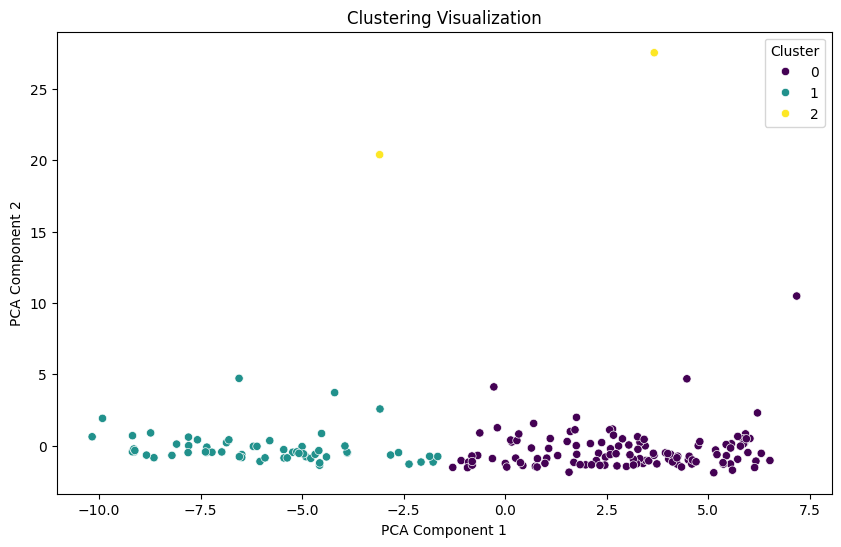

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_data_2005[:, 0], y=pca_data_2005[:, 1], hue=clusters, palette='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Visualization')
plt.legend(title='Cluster')
plt.show()

**ANALYZING CLUSTERS FOR 2005**

In [ ]:
df_2005[['Country Name','Cluster']]

,Country Name,Cluster
0,Afghanistan,1
1,Albania,0
2,Algeria,0
3,Angola,1
4,Antigua and Barbuda,0
...,...,...
178,Vietnam,0
179,West Bank and Gaza,0
180,"Yemen, Rep.",1
181,Zambia,1


In [ ]:
#FINDING TOTAL COUNTRIES IN EACH CLUSTER
df_2005['Cluster'] = clusters
df_2005_num['Cluster']=clusters
df_2005[['Country Name', 'Cluster']].groupby('Cluster').count()


C:\Users\Ashutosh Gupta\AppData\Local\Temp\ipykernel_28640\2404738825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2005['Cluster'] = clusters


,Country Name
Cluster,
0,121
1,60
2,2


In [ ]:
#AVERAGING INDICATOR VALUES FOR EACH COUNTRY ACROSS DIFFERENT CLUSTERS
cluster_means_2005 = df_2005_num.groupby('Cluster').mean()
cluster_means_2005

,2005_Access to clean fuels and technologies for cooking (% of population),2005_Access to electricity (% of population),"2005_Access to electricity, rural (% of rural population)","2005_Access to electricity, urban (% of urban population)",2005_Adjusted savings: natural resources depletion (% of GNI),2005_Adjusted savings: net forest depletion (% of GNI),2005_Age dependency ratio (% of working-age population),2005_Agricultural land (% of land area),2005_Agricultural methane emissions (% of total),2005_Agricultural nitrous oxide emissions (% of total),...,"2005_School enrollment, primary (% gross)","2005_School enrollment, primary (gross), gender parity index (GPI)","2005_School enrollment, secondary (% gross)","2005_School enrollment, tertiary (% gross)",2005_Scientific and technical journal articles,2005_Total fisheries production (metric tons),"2005_Unemployment, female (% of female labor force) (modeled ILO estimate)","2005_Unemployment, total (% of total labor force) (modeled ILO estimate)",2005_Urban population (% of total population),2005_Women Business and the Law Index Score (scale 1-100)
Cluster,,,,,,,,,,,,,,,,,,,,,
0,85.004959,95.490230,91.568603,98.519917,4.324832,0.207248,52.772024,36.748863,40.412933,71.417117,...,104.469507,0.984442,90.864867,39.104839,9642.333658,6.516395e+05,10.542613,8.902681,64.685612,70.129132
1,12.972500,31.452572,16.439363,61.780323,9.808838,4.214807,85.546431,42.603176,58.696590,82.911783,...,96.779214,0.882378,35.156544,5.685838,120.572444,1.945138e+05,8.705690,7.463377,34.445100,54.456250
2,37.450000,82.902119,77.413654,95.589024,2.508871,0.105174,50.044662,58.233298,59.105082,82.568710,...,104.283830,0.991348,59.960665,14.078193,77128.308333,3.024624e+07,4.930500,5.066500,35.878500,65.000000


## **Clustering for 2015**  

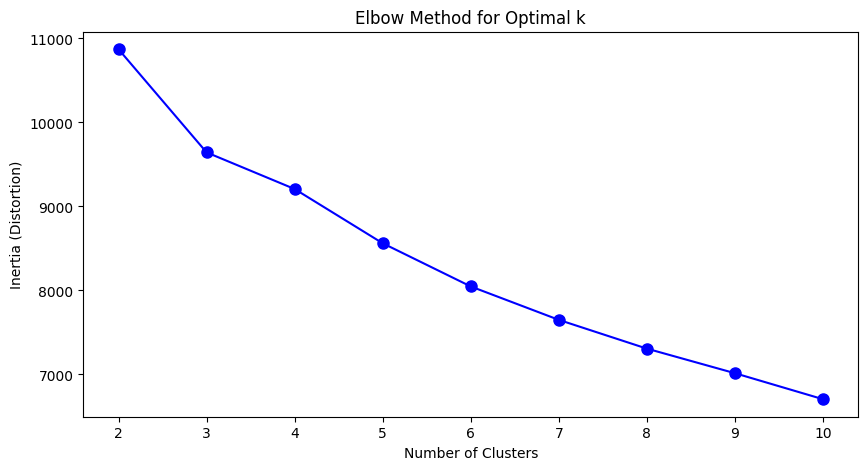

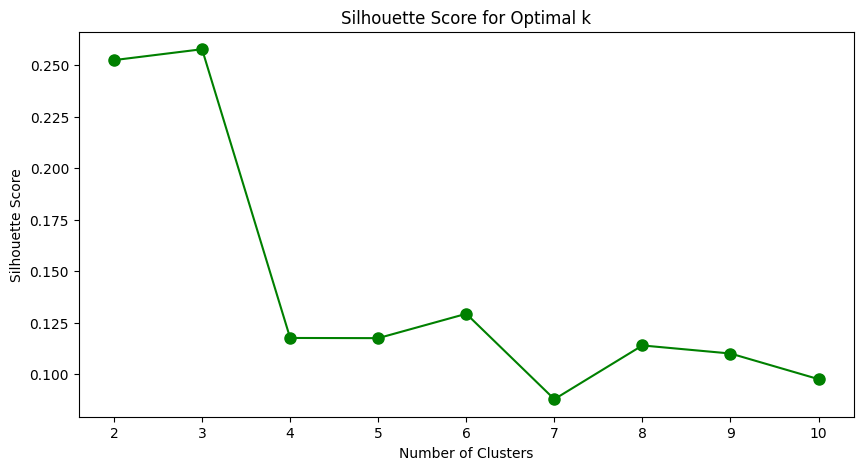

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

distortions = []
silhouette_scores = []

K = range(2, 11)  # k starts from at least 2

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pca_data_2015)

    distortions.append(kmeans.inertia_)  # Sum of squared distances
    silhouette_scores.append(silhouette_score(pca_data_2015, labels))

# Ploting Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K, distortions, 'bo-', markersize=8)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Distortion)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Ploting Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, 'go-', markersize=8)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


**K=3 IS OPTIMAL**

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_data_2015)
df_2015['Cluster'] = clusters

C:\Users\Ashutosh Gupta\AppData\Local\Temp\ipykernel_28640\3998454636.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['Cluster'] = clusters


**PLOTTING CLUSTER**

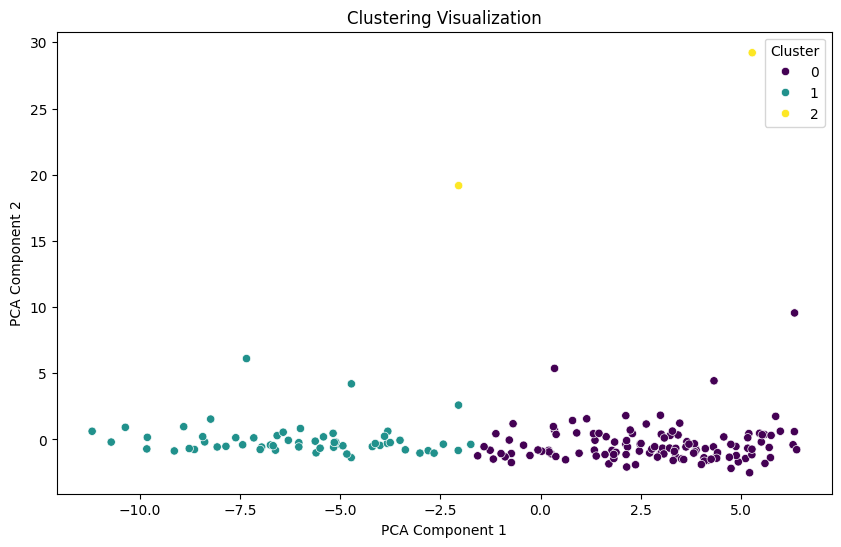

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_data_2015[:, 0], y=pca_data_2015[:, 1], hue=clusters, palette='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Visualization')
plt.legend(title='Cluster')
plt.show()


**ANALYZING CLUSTERS FOR 2015**

In [ ]:
df_2015[['Country Name','Cluster']]

,Country Name,Cluster
0,Afghanistan,1
1,Albania,0
2,Algeria,0
3,Angola,1
4,Antigua and Barbuda,0
...,...,...
178,Vietnam,0
179,West Bank and Gaza,0
180,"Yemen, Rep.",1
181,Zambia,1


In [ ]:
#FINDING TOTAL COUNTRIES IN EACH CLUSTER
df_2015['Cluster'] = clusters
df_2015_num['Cluster']=clusters
df_2015[['Country Name', 'Cluster']].groupby('Cluster').count()

C:\Users\Ashutosh Gupta\AppData\Local\Temp\ipykernel_28640\250188148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['Cluster'] = clusters


,Country Name
Cluster,
0,123
1,58
2,2


In [ ]:
#AVERAGING INDICATOR VALUES FOR EACH COUNTRY ACROSS DIFFERENT CLUSTERS
cluster_means_2015 = df_2015_num.groupby('Cluster').mean()
cluster_means_2015

,2015_Access to clean fuels and technologies for cooking (% of population),2015_Access to electricity (% of population),"2015_Access to electricity, rural (% of rural population)","2015_Access to electricity, urban (% of urban population)",2015_Adjusted savings: natural resources depletion (% of GNI),2015_Adjusted savings: net forest depletion (% of GNI),2015_Age dependency ratio (% of working-age population),2015_Agricultural land (% of land area),2015_Agricultural methane emissions (% of total),2015_Agricultural nitrous oxide emissions (% of total),...,"2015_School enrollment, primary (% gross)","2015_School enrollment, primary (gross), gender parity index (GPI)","2015_School enrollment, secondary (% gross)","2015_School enrollment, tertiary (% gross)",2015_Scientific and technical journal articles,2015_Total fisheries production (metric tons),"2015_Unemployment, female (% of female labor force) (modeled ILO estimate)","2015_Unemployment, total (% of total labor force) (modeled ILO estimate)",2015_Urban population (% of total population),2015_Women Business and the Law Index Score (scale 1-100)
Cluster,,,,,,,,,,,,,,,,,,,,,
0,89.012683,98.003922,95.838937,99.38894,1.903265,0.180565,50.048564,35.793841,40.256875,72.112400,...,103.263499,0.991545,97.609887,50.265448,14055.413615,7.490471e+05,9.901420,8.455257,66.675472,77.349593
1,16.565517,45.971625,28.285554,73.33405,5.770364,3.843665,81.004007,44.221708,58.763819,82.598161,...,105.222276,0.952891,51.003405,11.270740,377.214195,2.782212e+05,9.034228,7.440069,39.035552,62.851293
2,58.300000,94.000000,91.683968,98.75000,0.792896,0.149175,45.883659,58.260963,55.689857,80.752233,...,99.223724,1.021701,80.214415,32.816776,240371.980000,4.311146e+07,4.753500,5.032500,44.138500,70.937500


**COMPARING CLUSTERS FOR 2005 AND 2015**

In [ ]:
df_2005[['Country Name','Cluster']]

,Country Name,Cluster
0,Afghanistan,1
1,Albania,0
2,Algeria,0
3,Angola,1
4,Antigua and Barbuda,0
...,...,...
178,Vietnam,0
179,West Bank and Gaza,0
180,"Yemen, Rep.",1
181,Zambia,1


In [ ]:
df_2015[['Country Name','Cluster']]

,Country Name,Cluster
0,Afghanistan,1
1,Albania,0
2,Algeria,0
3,Angola,1
4,Antigua and Barbuda,0
...,...,...
178,Vietnam,0
179,West Bank and Gaza,0
180,"Yemen, Rep.",1
181,Zambia,1


In [ ]:
# Merging the dataframes on 'Country Name'
df_comparison = df_2005[['Country Name', 'Cluster']].merge(df_2015[['Country Name', 'Cluster']], on='Country Name', suffixes=('_2005', '_2015'))

df_comparison['Cluster_Changed'] = (df_comparison['Cluster_2005'] != df_comparison['Cluster_2015']).astype(int)

df_comparison[df_comparison['Cluster_Changed']==1]##If there is a change than output would be 1.


,Country Name,Cluster_2005,Cluster_2015,Cluster_Changed
18,Bhutan,1,0,1
66,Guatemala,1,0,1


**Therefore above Bhutan and Guatemala are the 2 countries which have changed their clusters between 2005 to 2015**

**Both these countries have showed growth and had are now in better cluster i.e. from '1' to '0' as concluded below**

## **FINDING WORST PERFORMING CLUSTER**

**Finding out top 10 indicators to compare different clusters**

In [ ]:
variation = cluster_means_2015.std()
top_variation_indicators = variation.sort_values(ascending=False).head(10)  # Top 10 most different indicators
top_variation_indicators

2015_Population, total                                                              7.653438e+08
2015_Population, female                                                             3.715692e+08
2015_Labor force, total                                                             3.581095e+08
2015_Total fisheries production (metric tons)                                       2.459499e+07
2015_Capture fisheries production (metric tons)                                     6.018636e+06
2015_CO2 emissions (kt)                                                             3.419838e+06
2015_Number of infant deaths                                                        2.932130e+05
2015_Nitrous oxide emissions (thousand metric tons of CO2 equivalent)               2.250842e+05
2015_Number of neonatal deaths                                                      2.135845e+05
2015_Methane emissions in energy sector (thousand metric tons of CO2 equivalent)    2.107351e+05
dtype: float64

In [ ]:
#CLASSIFYING DIFFERENT CLUSTERS BASED ON THESE TOP 10 INDICATORS

In [ ]:
imp_ind_2005=cluster_means_2005[['2005_Population, total' ,
                   '2005_Labor force, total',
                   '2005_Population, female',
                   '2005_Total fisheries production (metric tons)',
                   '2005_Capture fisheries production (metric tons)',
                   '2005_CO2 emissions (kt)',
                   '2005_Number of infant deaths',
                    '2005_Number of neonatal deaths' ,
                    '2005_Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
                    '2005_Methane emissions in energy sector (thousand metric tons of CO2 equivalent)']]

In [ ]:
imp_ind_2015=cluster_means_2015[['2015_Population, total' ,
                   '2015_Labor force, total',
                   '2015_Population, female',
                   '2015_Total fisheries production (metric tons)',
                   '2015_Capture fisheries production (metric tons)',
                   '2015_CO2 emissions (kt)',
                   '2015_Number of infant deaths',
                    '2015_Number of neonatal deaths' ,
                    '2015_Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
                    '2015_Methane emissions in energy sector (thousand metric tons of CO2 equivalent)']]

In [ ]:
interleaved_columns = [col for pair in zip(imp_ind_2005.columns, imp_ind_2015.columns) for col in pair]
pd.concat([imp_ind_2005,imp_ind_2015], axis=1)[interleaved_columns]

,"2005_Population, total","2015_Population, total","2005_Labor force, total","2015_Labor force, total","2005_Population, female","2015_Population, female",2005_Total fisheries production (metric tons),2015_Total fisheries production (metric tons),2005_Capture fisheries production (metric tons),2015_Capture fisheries production (metric tons),2005_CO2 emissions (kt),2015_CO2 emissions (kt),2005_Number of infant deaths,2015_Number of infant deaths,2005_Number of neonatal deaths,2015_Number of neonatal deaths,2005_Nitrous oxide emissions (thousand metric tons of CO2 equivalent),2015_Nitrous oxide emissions (thousand metric tons of CO2 equivalent),2005_Methane emissions in energy sector (thousand metric tons of CO2 equivalent),2015_Methane emissions in energy sector (thousand metric tons of CO2 equivalent)
Cluster,,,,,,,,,,,,,,,,,,,,
0,2.364586e+07,2.572970e+07,1.083510e+07,1.204139e+07,1.197358e+07,1.298269e+07,6.516395e+05,7.490471e+05,5.234213e+05,4.640699e+05,1.644575e+05,1.641852e+05,7795.035813,5748.394038,4696.801653,3599.615718,12311.669421,12450.878049,16060.760331,17438.243902
1,1.990736e+07,2.576814e+07,7.620093e+06,9.851197e+06,9.921802e+06,1.287768e+07,1.945138e+05,2.782212e+05,1.621800e+05,2.016899e+05,7.431167e+03,1.122983e+04,52205.711111,46003.672414,27590.811111,26405.890805,7882.000000,9481.379310,4072.700000,4507.620690
2,1.229179e+09,1.351363e+09,6.078673e+08,6.312073e+08,5.969365e+08,6.565070e+08,3.024624e+07,4.311146e+07,9.288046e+06,1.075499e+07,3.480550e+06,6.009560e+06,978135.166667,532537.833333,674392.500000,384414.333333,314520.000000,400815.000000,258395.000000,375805.000000


**FROM THE TABLE ITS EVIDENT THAT THE WORST PERFORMING CLUSTER IS '1'**
**WHICH PROBABLY CONTAINS UNDER-DEVELOPED OR DEVELOPING COUNTRIES**

# **FINDING OUT THE INDICATORS WHICH ARE MOST CONTRIBUTING TO POOR PERFORMANCE OF THE '1' CLUSTER**


In [ ]:
#Countries in cluster 1 for 2015
df_2015[['Country Name','Cluster']][df_2015[['Country Name','Cluster']]['Cluster']==1]

,Country Name,Cluster
0,Afghanistan,1
3,Angola,1
12,Bangladesh,1
17,Benin,1
21,Botswana,1
25,Burkina Faso,1
26,Burundi,1
28,Cambodia,1
29,Cameroon,1
31,Central African Republic,1


# COMPARING CLUSTERS OF '0' (DEVELOPED COUNTRIES CLUSTER) WITH '1' (DEVELOPING COUNTRIES CLUSTER)

In [ ]:
cluster_comp=cluster_means_2015.loc[0:1]
cluster_comp

,2015_Access to clean fuels and technologies for cooking (% of population),2015_Access to electricity (% of population),"2015_Access to electricity, rural (% of rural population)","2015_Access to electricity, urban (% of urban population)",2015_Adjusted savings: natural resources depletion (% of GNI),2015_Adjusted savings: net forest depletion (% of GNI),2015_Age dependency ratio (% of working-age population),2015_Agricultural land (% of land area),2015_Agricultural methane emissions (% of total),2015_Agricultural nitrous oxide emissions (% of total),...,"2015_School enrollment, primary (% gross)","2015_School enrollment, primary (gross), gender parity index (GPI)","2015_School enrollment, secondary (% gross)","2015_School enrollment, tertiary (% gross)",2015_Scientific and technical journal articles,2015_Total fisheries production (metric tons),"2015_Unemployment, female (% of female labor force) (modeled ILO estimate)","2015_Unemployment, total (% of total labor force) (modeled ILO estimate)",2015_Urban population (% of total population),2015_Women Business and the Law Index Score (scale 1-100)
Cluster,,,,,,,,,,,,,,,,,,,,,
0,89.012683,98.003922,95.838937,99.38894,1.903265,0.180565,50.048564,35.793841,40.256875,72.112400,...,103.263499,0.991545,97.609887,50.265448,14055.413615,749047.110894,9.901420,8.455257,66.675472,77.349593
1,16.565517,45.971625,28.285554,73.33405,5.770364,3.843665,81.004007,44.221708,58.763819,82.598161,...,105.222276,0.952891,51.003405,11.270740,377.214195,278221.163379,9.034228,7.440069,39.035552,62.851293


In [ ]:
cluster_comp.loc[len(cluster_comp)]=((cluster_comp.loc[0]-cluster_comp.loc[1])/cluster_comp.loc[0])*100

In [ ]:
cluster_comp.index=[0,1,'Percentage_difference']

In [ ]:
cluster_comp

,2015_Access to clean fuels and technologies for cooking (% of population),2015_Access to electricity (% of population),"2015_Access to electricity, rural (% of rural population)","2015_Access to electricity, urban (% of urban population)",2015_Adjusted savings: natural resources depletion (% of GNI),2015_Adjusted savings: net forest depletion (% of GNI),2015_Age dependency ratio (% of working-age population),2015_Agricultural land (% of land area),2015_Agricultural methane emissions (% of total),2015_Agricultural nitrous oxide emissions (% of total),...,"2015_School enrollment, primary (% gross)","2015_School enrollment, primary (gross), gender parity index (GPI)","2015_School enrollment, secondary (% gross)","2015_School enrollment, tertiary (% gross)",2015_Scientific and technical journal articles,2015_Total fisheries production (metric tons),"2015_Unemployment, female (% of female labor force) (modeled ILO estimate)","2015_Unemployment, total (% of total labor force) (modeled ILO estimate)",2015_Urban population (% of total population),2015_Women Business and the Law Index Score (scale 1-100)
0,89.012683,98.003922,95.838937,99.38894,1.903265,0.180565,50.048564,35.793841,40.256875,72.112400,...,103.263499,0.991545,97.609887,50.265448,14055.413615,749047.110894,9.901420,8.455257,66.675472,77.349593
1,16.565517,45.971625,28.285554,73.33405,5.770364,3.843665,81.004007,44.221708,58.763819,82.598161,...,105.222276,0.952891,51.003405,11.270740,377.214195,278221.163379,9.034228,7.440069,39.035552,62.851293
Percentage_difference,81.389711,53.092056,70.486365,26.21508,-203.182340,-2028.692153,-61.850812,-23.545580,-45.972131,-14.540856,...,-1.896873,3.898417,47.747707,77.577559,97.316236,62.856654,8.758258,12.006589,41.454405,18.743861


**ABOVE ARE THE PERCENTAGE DIFFERENCES BY WHICH THE DEVELOPING COUNTRIES ARE LACKING WRT DEVELOPED COUNTRIES**

In [ ]:
#HERE -VE PERCENTAGES INDICATE -VE INDICATORS WHICH MEANS THAT THE DEVOLPING NATION IS (X% OF DEVELOPED) IN MORE POORER STATE FOR THAT INDICATOR

**HERE THE MOST POOR PERFORMING INDICATORS WOULD TOP 10 OF POSITIVE INDICATORS AND TOP 10 OF -VE INDICATORS. GIVING US OUR TOP 20 INDICATORS OUT OF 80 THAT DEVLOPING COUNTRIES SHOULD WORK ON**

In [ ]:
cluster_comp.loc['Percentage_difference'].sort_values(ascending=False)[:41]

2015_Scientific and technical journal articles                                                                   97.316236
2015_CO2 emissions (kt)                                                                                          93.160266
2015_Electric power consumption (kWh per capita)                                                                 91.875301
2015_CO2 emissions (metric tons per capita)                                                                      90.087931
2015_Annual freshwater withdrawals, total (% of internal resources)                                              85.747126
2015_Level of water stress: freshwater withdrawal as a proportion of available freshwater resources              83.827344
2015_Access to clean fuels and technologies for cooking (% of population)                                        81.389711
2015_Energy use (kg of oil equivalent per capita)                                                                80.620933
2015_School enro

In [ ]:
cluster_comp.loc['Percentage_difference'].sort_values(ascending=True)[:40]

2015_Adjusted savings: net forest depletion (% of GNI)                                                                                   -2028.692153
2015_Number of maternal deaths                                                                                                           -1542.159895
2015_People practicing open defecation (% of population)                                                                                 -1487.656024
2015_Number of infant deaths                                                                                                              -700.287387
2015_Number of neonatal deaths                                                                                                            -633.575272
2015_Incidence of HIV, all (per 1,000 uninfected population)                                                                              -618.476365
2015_Mortality rate, under-5 (per 1,000 live births)                                                

**THEREFORE THE WORST PERFORMING INDICATORS ARE AS FOLLOWS**

In [ ]:
# 2015_Scientific and technical journal articles
# 2015_CO2 emissions (kt)
# 2015_Electric power consumption (kWh per capita)
# 2015_CO2 emissions (metric tons per capita)
# 2015_Annual freshwater withdrawals, total (% of internal resources)
# 2015_Level of water stress: freshwater withdrawal as a proportion of available freshwater resources
# 2015_Access to clean fuels and technologies for cooking (% of population)
# 2015_Energy use (kg of oil equivalent per capita)
# 2015_School enrollment, tertiary (% gross)
# 2015_Individuals using the Internet (% of population)
# 2015_Adjusted savings: net forest depletion (% of GNI)
# 2015_Number of maternal deaths
# 2015_People practicing open defecation (% of population)
# 2015_Number of infant deaths
# 2015_Number of neonatal deaths
# 2015_Incidence of HIV, all (per 1,000 uninfected population)
# 2015_Mortality rate, under-5 (per 1,000 live births)
# 2015_Energy imports, net (% of energy use)
# 2015_Children out of school (% of primary school age)
# 2015_Incidence of tuberculosis (per 100,000 people)

# **STRATEGIES TO IMPROVE THESE INDICATORS**

In [ ]:

pd.set_option('display.max_colwidth', None)


data = {
    "Indicator": [
        "Scientific and technical journal articles",
        "CO₂ emissions (kt)",
        "Electric power consumption (kWh per capita)",
        "CO₂ emissions (metric tons per capita)",
        "Annual freshwater withdrawals, total (% of internal resources)",
        "Level of water stress: freshwater withdrawal as a proportion of available freshwater resources",
        "Access to clean fuels and technologies for cooking (% of population)",
        "Energy use (kg of oil equivalent per capita)",
        "School enrollment, tertiary (% gross)",
        "Individuals using the Internet (% of population)",
        "Adjusted savings: net forest depletion (% of GNI)",
        "Number of maternal deaths",
        "People practicing open defecation (% of population)",
        "Number of infant deaths",
        "Number of neonatal deaths",
        "Incidence of HIV, all (per 1,000 uninfected population)",
        "Mortality rate, under-5 (per 1,000 live births)",
        "Energy imports, net (% of energy use)",
        "Children out of school (% of primary school age)",
        "Incidence of tuberculosis (per 100,000 people)"
    ],
    "Targeted Strategies for Improvement": [
        """- Increasing R&D investment in universities and private research institutions.
        - Strengthening STEM education at all levels.
        - Encouraging international collaboration by funding joint research programs.
        - Offering incentives for publication in high-impact journals.
        - Establishing innovation hubs to connect academia with industry for applied research.""",

        """- Implementing carbon pricing (e.g., carbon tax or cap-and-trade).
        - Promoting renewable energy (solar, wind, hydro) to reduce dependency on fossil fuels.
        - Investing in energy-efficient infrastructure and smart grids.
        - Encouraging public transport and electric vehicles (EVs) to reduce transportation emissions.
        - Supporting afforestation and reforestation programs to offset emissions.""",

        """- Improving energy efficiency through policies and technology adoption.
        - Promoting smart metering and grid optimization to reduce wastage.
        - Encouraging energy-saving appliances via subsidies and efficiency ratings.
        - Increasing access to renewable sources for sustainable electricity consumption.""",

        """- Reducing industrial emissions via cleaner production technologies.
        - Enhancing urban planning to reduce vehicular emissions and energy consumption.
        - Supporting carbon sequestration projects through reforestation and direct air capture.
        - Introducing mandatory carbon reporting for corporations to track progress.""",

        """- Implementing sustainable irrigation techniques like drip irrigation.
        - Enhancing water recycling and reuse systems in industries.
        - Encouraging rainwater harvesting in urban and rural areas.
        - Strengthening water governance to ensure equitable distribution.""",

        """- Developing desalination projects where feasible.
        - Adopting stricter water conservation regulations for industries and agriculture.
        - Investing in watershed management to restore natural water bodies.
        - Reducing leakage losses in water supply systems through better infrastructure.""",

        """- Subsidizing clean cooking fuels such as LPG, biogas, and electricity.
        - Expanding rural electrification projects to enable cleaner energy access.
        - Promoting improved cookstoves that are energy-efficient and reduce emissions.
        - Educating communities on health risks of biomass and coal cooking.""",

        """- Diversifying energy sources with a stronger focus on renewables.
        - Improving energy efficiency in industries and homes through incentives.
        - Promoting public transportation to reduce per capita fuel consumption.
        - Encouraging behavioral changes like energy conservation awareness campaigns.""",

        """- Expanding higher education institutions and vocational training programs.
        - Providing scholarships and financial aid to increase affordability.
        - Improving online and distance learning access.
        - Creating stronger industry-academia linkages for better job market alignment.""",

        """- Expanding broadband infrastructure, especially in rural areas.
        - Lowering data costs through regulatory reforms.
        - Promoting digital literacy programs for all age groups.
        - Introducing public Wi-Fi zones in underserved regions.""",

        """- Strengthening reforestation programs and biodiversity conservation.
        - Enforcing sustainable logging regulations with strict penalties for violations.
        - Introducing green taxation policies for industries using forest resources.
        - Encouraging agroforestry as an alternative income source for rural communities.""",

        """- Increasing access to quality maternal healthcare and prenatal services.
        - Training more midwives and obstetricians in rural and underserved areas.
        - Improving emergency transport systems for high-risk pregnancies.
        - Expanding maternal health awareness programs to promote antenatal care.""",

        """- Expanding sanitation infrastructure, especially in rural areas.
        - Implementing behavior change campaigns to promote toilet usage.
        - Providing subsidies for household toilets in low-income areas.
        - Enforcing sanitation policies to ensure proper waste management.""",

        """- Expanding neonatal care units in hospitals.
        - Increasing immunization coverage for preventable diseases.
        - Improving maternal nutrition programs to prevent low birth weight.
        - Ensuring access to clean water and sanitation to prevent infections.""",

        """- Strengthening skilled birth attendance and emergency neonatal care.
        - Encouraging early breastfeeding for improved immunity.
        - Expanding training programs for neonatal nurses and pediatricians.
        - Improving postnatal follow-up for at-risk newborns.""",

        """- Expanding HIV awareness and prevention programs.
        - Improving access to antiretroviral therapy (ART).
        - Distributing condoms widely and promoting safe sex practices.
        - Reducing stigma and discrimination to encourage more people to seek testing.""",

        """- Expanding child vaccination programs against major diseases.
        - Improving nutrition interventions for children under 5.
        - Enhancing access to clean drinking water and sanitation facilities.
        - Strengthening community-based healthcare to detect and treat illnesses early.""",

        """- Investing in domestic energy production (hydro, solar, wind).
        - Encouraging energy self-sufficiency through policy incentives.
        - Reducing reliance on fossil fuel imports by increasing renewables.""",

        """- Providing free primary education and removing hidden school costs.
        - Improving school transportation systems to reach remote areas.
        - Launching school meal programs to encourage attendance.
        - Implementing flexible schooling options for working children.""",

        """- Strengthening TB vaccination and early detection programs.
        - Ensuring availability of free TB treatment and DOTS therapy.
        - Improving living conditions in high-risk areas to reduce transmission.
        - Enhancing public awareness campaigns to encourage early diagnosis."""
    ]
}
df_strat=pd.DataFrame(data)
df_strat

,Indicator,Targeted Strategies for Improvement
0,Scientific and technical journal articles,- Increasing R&D investment in universities and private research institutions. \n - Strengthening STEM education at all levels. \n - Encouraging international collaboration by funding joint research programs. \n - Offering incentives for publication in high-impact journals. \n - Establishing innovation hubs to connect academia with industry for applied research.
1,CO₂ emissions (kt),"- Implementing carbon pricing (e.g., carbon tax or cap-and-trade). \n - Promoting renewable energy (solar, wind, hydro) to reduce dependency on fossil fuels. \n - Investing in energy-efficient infrastructure and smart grids. \n - Encouraging public transport and electric vehicles (EVs) to reduce transportation emissions. \n - Supporting afforestation and reforestation programs to offset emissions."
2,Electric power consumption (kWh per capita),- Improving energy efficiency through policies and technology adoption. \n - Promoting smart metering and grid optimization to reduce wastage. \n - Encouraging energy-saving appliances via subsidies and efficiency ratings. \n - Increasing access to renewable sources for sustainable electricity consumption.
3,CO₂ emissions (metric tons per capita),- Reducing industrial emissions via cleaner production technologies. \n - Enhancing urban planning to reduce vehicular emissions and energy consumption. \n - Supporting carbon sequestration projects through reforestation and direct air capture. \n - Introducing mandatory carbon reporting for corporations to track progress.
4,"Annual freshwater withdrawals, total (% of internal resources)",- Implementing sustainable irrigation techniques like drip irrigation. \n - Enhancing water recycling and reuse systems in industries. \n - Encouraging rainwater harvesting in urban and rural areas. \n - Strengthening water governance to ensure equitable distribution.
5,Level of water stress: freshwater withdrawal as a proportion of available freshwater resources,- Developing desalination projects where feasible. \n - Adopting stricter water conservation regulations for industries and agriculture. \n - Investing in watershed management to restore natural water bodies. \n - Reducing leakage losses in water supply systems through better infrastructure.
6,Access to clean fuels and technologies for cooking (% of population),"- Subsidizing clean cooking fuels such as LPG, biogas, and electricity. \n - Expanding rural electrification projects to enable cleaner energy access. \n - Promoting improved cookstoves that are energy-efficient and reduce emissions. \n - Educating communities on health risks of biomass and coal cooking."
7,Energy use (kg of oil equivalent per capita),- Diversifying energy sources with a stronger focus on renewables. \n - Improving energy efficiency in industries and homes through incentives. \n - Promoting public transportation to reduce per capita fuel consumption. \n - Encouraging behavioral changes like energy conservation awareness campaigns.
8,"School enrollment, tertiary (% gross)",- Expanding higher education institutions and vocational training programs. \n - Providing scholarships and financial aid to increase affordability. \n - Improving online and distance learning access. \n - Creating stronger industry-academia linkages for better job market alignment.
9,Individuals using the Internet (% of population),"- Expanding broadband infrastructure, especially in rural areas. \n - Lowering data costs through regulatory reforms. \n - Promoting digital literacy programs for all age groups. \n - Introducing public Wi-Fi zones in underserved regions."


In [ ]:
#MAKING SEPERATE DATAFRAME FOR WORST INDICATORS CONTAINING 2005 AND 2015 DATA
data = {
    'Adjusted savings: net forest depletion (% of GNI)': [124.160460, 377.214195],
    'Number of maternal deaths': [7487.413789, 11229.827738],
    'People practicing open defecation (% of population)': [365.577549, 451.357097],
    'Number of infant deaths': [0.583891, 0.584971],
    'Number of neonatal deaths': [22.699706, 23.949873],
    'Incidence of HIV, all (per 1,000 uninfected population)': [13.376993, 14.342045],
    'Mortality rate, under-5 (per 1,000 live births)': [12.739655, 16.565517],
    'Energy imports, net (% of energy use)': [508.089776, 582.691514],
    'Children out of school (% of primary school age)': [4.976911, 11.382803],
    'Incidence of tuberculosis (per 100,000 people)': [1.877556, 14.258909],
    'Scientific and technical journal articles': [4.362866, 3.824270],
    'CO2 emissions (kt)': [4822.109195, 3997.293103],
    'Electric power consumption (kWh per capita)': [31.823104, 23.939892],
    'CO2 emissions (metric tons per capita)': [53750.959770, 46003.672414],
    'Annual freshwater withdrawals, total (% of internal resources)': [28404.465517, 26405.890805],
    'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources': [2.588253, 1.445851],
    'Access to clean fuels and technologies for cooking (% of population)': [109.274713, 73.256897],
    'Energy use (kg of oil equivalent per capita)': [-59.331100, -28.109178],
    'School enrollment, tertiary (% gross)': [27.418988, 17.001712],
    'Individuals using the Internet (% of population)': [343.356322, 269.931034]
}
worst_ind=pd.DataFrame(data)
worst_ind

,Adjusted savings: net forest depletion (% of GNI),Number of maternal deaths,People practicing open defecation (% of population),Number of infant deaths,Number of neonatal deaths,"Incidence of HIV, all (per 1,000 uninfected population)","Mortality rate, under-5 (per 1,000 live births)","Energy imports, net (% of energy use)",Children out of school (% of primary school age),"Incidence of tuberculosis (per 100,000 people)",Scientific and technical journal articles,CO2 emissions (kt),Electric power consumption (kWh per capita),CO2 emissions (metric tons per capita),"Annual freshwater withdrawals, total (% of internal resources)",Level of water stress: freshwater withdrawal as a proportion of available freshwater resources,Access to clean fuels and technologies for cooking (% of population),Energy use (kg of oil equivalent per capita),"School enrollment, tertiary (% gross)",Individuals using the Internet (% of population)
0,124.160460,7487.413789,365.577549,0.583891,22.699706,13.376993,12.739655,508.089776,4.976911,1.877556,4.362866,4822.109195,31.823104,53750.959770,28404.465517,2.588253,109.274713,-59.331100,27.418988,343.356322
1,377.214195,11229.827738,451.357097,0.584971,23.949873,14.342045,16.565517,582.691514,11.382803,14.258909,3.824270,3997.293103,23.939892,46003.672414,26405.890805,1.445851,73.256897,-28.109178,17.001712,269.931034


# **VISUALIZING WORST PERFORMING INDICATORS**

C:\Users\Ashutosh Gupta\AppData\Local\Temp\ipykernel_28640\219234909.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=indicators, palette="Reds_r")


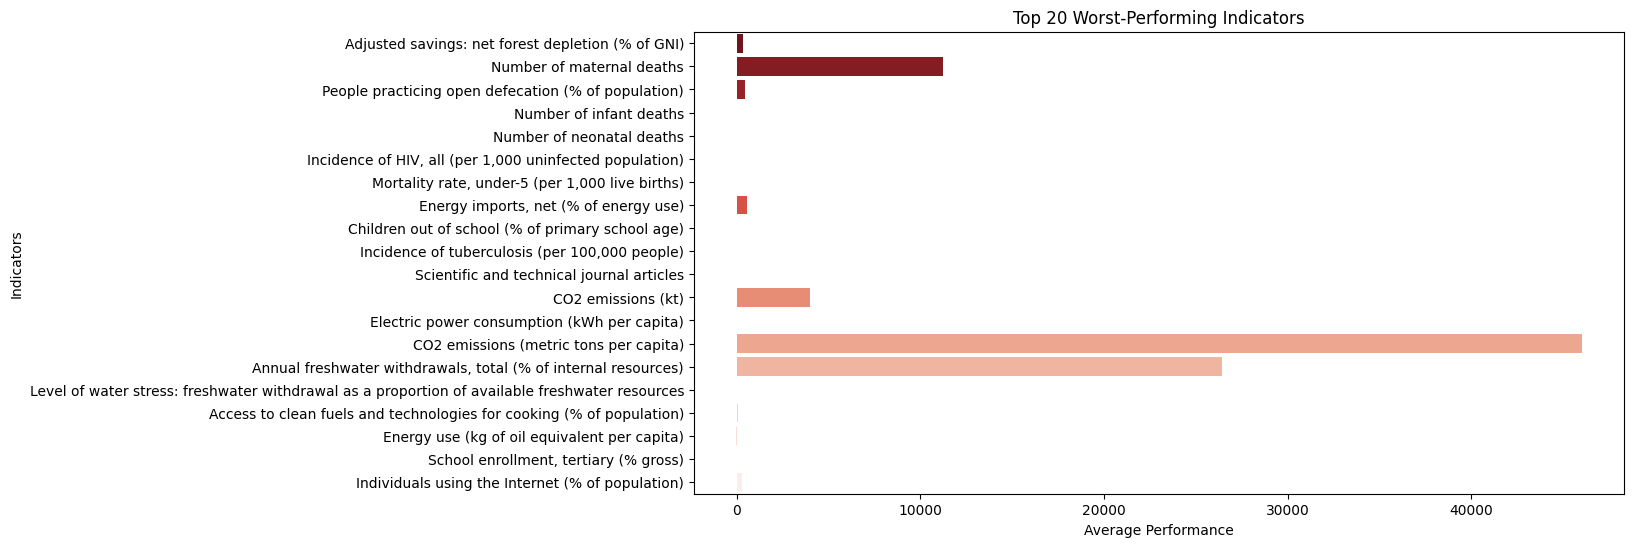

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

indicators = ['Adjusted savings: net forest depletion (% of GNI)','Number of maternal deaths','People practicing open defecation (% of population)','Number of infant deaths','Number of neonatal deaths','Incidence of HIV, all (per 1,000 uninfected population)','Mortality rate, under-5 (per 1,000 live births)','Energy imports, net (% of energy use)','Children out of school (% of primary school age)','Incidence of tuberculosis (per 100,000 people)'
,'Scientific and technical journal articles','CO2 emissions (kt)','Electric power consumption (kWh per capita)','CO2 emissions (metric tons per capita)','Annual freshwater withdrawals, total (% of internal resources)','Level of water stress: freshwater withdrawal as a proportion of available freshwater resources','Access to clean fuels and technologies for cooking (% of population)','Energy use (kg of oil equivalent per capita)','School enrollment, tertiary (% gross)','Individuals using the Internet (% of population)'
]
scores = [377.214195,11229.827738,451.357097,0.584971,23.949873,14.342045,16.565517,582.691514,11.382803,14.258909,3.824270,3997.293103,23.939892,46003.672414,26405.890805,1.445851,73.256897,-28.109178,17.001712,269.931034]

plt.figure(figsize=(12, 6))
sns.barplot(x=scores, y=indicators, palette="Reds_r")
plt.xlabel("Average Performance")
plt.ylabel("Indicators")
plt.title("Top 20 Worst-Performing Indicators")
plt.show()

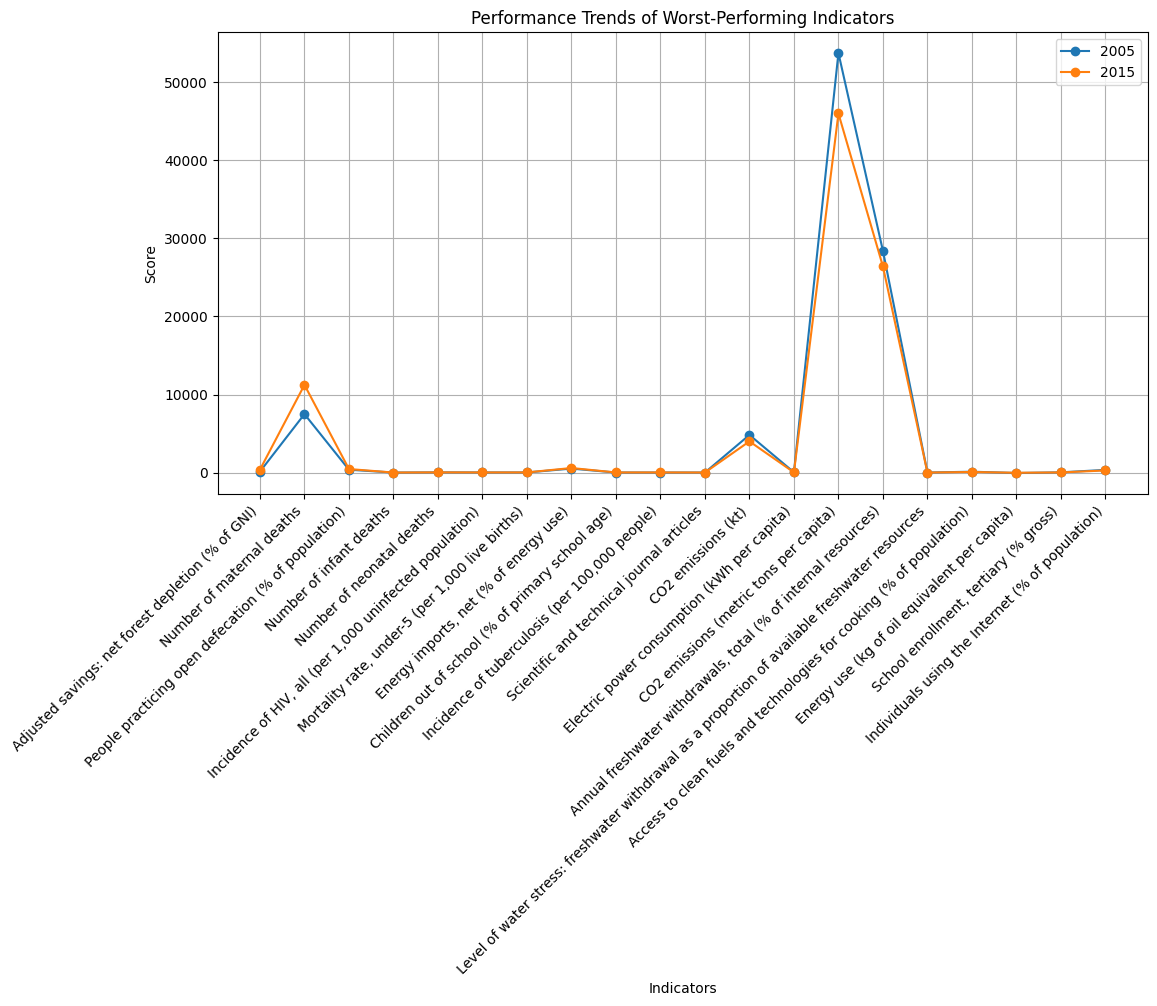

In [ ]:
fd = pd.DataFrame({
    "Indicator": ['Adjusted savings: net forest depletion (% of GNI)','Number of maternal deaths','People practicing open defecation (% of population)','Number of infant deaths','Number of neonatal deaths','Incidence of HIV, all (per 1,000 uninfected population)','Mortality rate, under-5 (per 1,000 live births)','Energy imports, net (% of energy use)','Children out of school (% of primary school age)','Incidence of tuberculosis (per 100,000 people)'
,'Scientific and technical journal articles','CO2 emissions (kt)','Electric power consumption (kWh per capita)','CO2 emissions (metric tons per capita)','Annual freshwater withdrawals, total (% of internal resources)','Level of water stress: freshwater withdrawal as a proportion of available freshwater resources','Access to clean fuels and technologies for cooking (% of population)','Energy use (kg of oil equivalent per capita)','School enrollment, tertiary (% gross)','Individuals using the Internet (% of population)'],
    "2005": [124.160460,7487.413789,365.577549,0.583891,22.699706,13.376993,12.739655,508.089776,4.976911,1.877556,4.362866,4822.109195,31.823104,53750.959770,28404.465517,2.588253,109.274713,-59.331100,27.418988,343.356322],
    "2015": [377.214195,11229.827738,451.357097,0.584971,23.949873,14.342045,16.565517,582.691514,11.382803,14.258909,3.824270,3997.293103,23.939892,46003.672414,26405.890805,1.445851,73.256897,-28.109178,17.001712,269.931034]
})

plt.figure(figsize=(12, 6))
for year in ["2005", "2015"]:
    plt.plot(fd["Indicator"], fd[year], marker="o", label=year)

plt.xlabel("Indicators")
plt.ylabel("Score")
plt.title("Performance Trends of Worst-Performing Indicators")
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.grid()
plt.show()

In [ ]:
#SCALING DATA IN df FOR APPLYING OTHER VISUALIZATION TECHNIQUES
from sklearn.preprocessing import MinMaxScaler
fd_log = fd.iloc[:, 1:].apply(lambda x: np.log1p(x))  # log(1 + x) to handle zeros
scaler = MinMaxScaler()
fd_scaled = pd.DataFrame(scaler.fit_transform(fd_log), columns=fd.columns[1:])
fd_scaled['Indicator']=fd.Indicator

C:\Users\Ashutosh Gupta\AppData\Roaming\Python\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


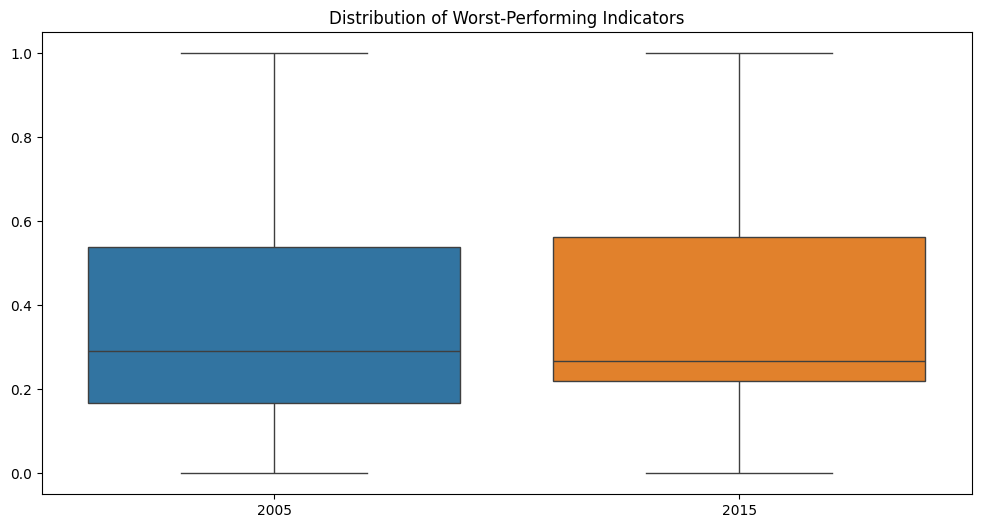

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=fd_scaled)
plt.title("Distribution of Worst-Performing Indicators")
plt.show()

# **Correlation Analysis**

In [ ]:
df_india=df[df['Country Name']=='India']
df_india.drop(['Country Name','Country Code'],axis=1,inplace=True)
df_india

C:\Users\Ashutosh Gupta\AppData\Local\Temp\ipykernel_28640\3538070538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_india.drop(['Country Name','Country Code'],axis=1,inplace=True)


,Indicators,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
11036,Access to clean fuels and technologies for cooking (% of population),22.300000,23.400000,24.700000,25.900000,27.300000,28.600000,29.500000,30.550000,32.000000,34.000000,35.400000,37.200000,39.600000,41.600000,44.800000,48.200000
11037,Access to electricity (% of population),58.721474,55.799999,62.299999,64.047485,64.400002,67.579811,67.900002,71.119865,72.899384,75.000000,76.300003,67.599998,79.900002,81.999329,83.872498,88.000000
11038,"Access to electricity, rural (% of rural population)",47.235325,43.483578,51.474499,53.532608,53.636147,57.722305,57.320301,61.939899,64.071182,65.702232,68.373825,56.086079,72.404007,75.219864,77.581932,83.367935
11039,"Access to electricity, urban (% of urban population)",88.751030,87.599998,89.803001,90.333946,90.877449,91.440468,93.099998,92.635971,93.259178,96.099998,94.000000,92.900002,96.099998,96.403702,97.006844,97.500000
11040,Adjusted savings: natural resources depletion (% of GNI),1.472196,1.234784,1.284418,1.211549,1.419462,1.800222,2.094620,2.402737,3.303583,1.625350,2.221029,2.566965,1.951014,1.800704,1.404697,0.876363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11154,"Unemployment, female (% of female labor force) (modeled ILO estimate)",6.026000,6.014000,5.944000,6.022000,5.982000,5.939000,5.904000,5.852000,5.681000,5.772000,5.746000,5.611000,5.571000,5.548000,5.526000,5.491000
11155,"Unemployment, total (% of total labor force) (modeled ILO estimate)",5.561000,5.576000,5.530000,5.643000,5.629000,5.613000,5.601000,5.572000,5.414000,5.544000,5.546000,5.426000,5.414000,5.424000,5.436000,5.435000
11157,Urban population (% of total population),27.667000,27.918000,28.244000,28.572000,28.903000,29.235000,29.569000,29.906000,30.246000,30.587000,30.930000,31.276000,31.634000,32.003000,32.384000,32.777000
11158,Vitamin A supplementation coverage rate (% of children ages 6-59 months),10.000000,23.000000,30.000000,34.000000,35.000000,49.000000,25.000000,36.000000,57.000000,68.000000,35.000000,58.000000,55.000000,54.000000,61.000000,53.000000


In [ ]:
df_india= df_india.set_index('Indicators').T.reset_index()
df_india.drop('index',axis=1,inplace=True)
df_india #I named the df_india and pivoted version of it the same pls avoid confusion.

Indicators,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adjusted savings: natural resources depletion (% of GNI),Adjusted savings: net forest depletion (% of GNI),Age dependency ratio (% of working-age population),Agricultural land (% of land area),Agricultural methane emissions (% of total),Agricultural nitrous oxide emissions (% of total),...,"School enrollment, secondary (% gross)","School enrollment, tertiary (% gross)",Scientific and technical journal articles,"Secondary education, teachers, female",Total fisheries production (metric tons),"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Urban population (% of total population),Vitamin A supplementation coverage rate (% of children ages 6-59 months),Women Business and the Law Index Score (scale 1-100)
0,22.30,58.721474,47.235325,88.751030,1.472196,0.343284,65.408167,60.868966,77.489177,89.334513,...,44.871979,9.508720,21770.720000,723857.0,5668958.00,6.026,5.561,27.667,10.0,60.00
1,23.40,55.799999,43.483578,87.599998,1.234784,0.331257,64.553243,60.704832,77.077518,89.005405,...,45.011839,9.601610,22359.150000,741944.0,5937726.00,6.014,5.576,27.918,23.0,60.00
2,24.70,62.299999,51.474499,89.803001,1.284418,0.374538,63.703789,60.729385,76.239841,88.051368,...,45.699046,9.793214,23190.590000,805673.0,5973298.00,5.944,5.530,28.244,30.0,60.00
3,25.90,64.047485,53.532608,90.333946,1.211549,0.341928,62.850414,60.624783,75.980351,87.956655,...,47.283403,10.165430,25032.320000,868260.0,6074846.00,6.022,5.643,28.572,34.0,60.00
4,27.30,64.400002,53.636147,90.877449,1.419462,0.244575,61.962321,60.667162,75.684231,87.806017,...,49.356786,10.578334,27165.676667,877273.0,6230871.00,5.982,5.629,28.903,35.0,60.00
5,28.60,67.579811,57.722305,91.440468,1.800222,0.210349,61.057335,60.583414,75.661188,87.852269,...,51.655319,10.746073,30053.216667,1567810.0,6698487.99,5.939,5.613,29.235,49.0,60.00
6,29.50,67.900002,57.320301,93.099998,2.094620,0.284243,60.120965,60.509419,75.554992,87.888668,...,53.407949,11.033070,33793.030000,1567810.0,7060154.00,5.904,5.601,29.569,25.0,60.00
7,30.55,71.119865,61.939899,92.635971,2.402737,0.303437,59.155016,60.413226,75.563781,87.895143,...,55.375956,11.764227,38552.946667,1567810.0,7005055.00,5.852,5.572,29.906,36.0,60.00
8,32.00,72.899384,64.071182,93.259178,3.303583,0.301543,58.205611,60.459305,75.387808,87.651849,...,57.505100,13.220083,43713.620000,1567810.0,7984490.00,5.681,5.414,30.246,57.0,60.00
9,34.00,75.000000,65.702232,96.099998,1.625350,0.261520,57.281108,60.563906,75.387808,87.651849,...,59.082005,14.734940,49141.053333,1567810.0,7893598.00,5.772,5.544,30.587,68.0,60.00


In [ ]:
df_india

Indicators,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adjusted savings: natural resources depletion (% of GNI),Adjusted savings: net forest depletion (% of GNI),Age dependency ratio (% of working-age population),Agricultural land (% of land area),Agricultural methane emissions (% of total),Agricultural nitrous oxide emissions (% of total),...,"School enrollment, secondary (% gross)","School enrollment, tertiary (% gross)",Scientific and technical journal articles,"Secondary education, teachers, female",Total fisheries production (metric tons),"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Urban population (% of total population),Vitamin A supplementation coverage rate (% of children ages 6-59 months),Women Business and the Law Index Score (scale 1-100)
0,22.30,58.721474,47.235325,88.751030,1.472196,0.343284,65.408167,60.868966,77.489177,89.334513,...,44.871979,9.508720,21770.720000,723857.0,5668958.00,6.026,5.561,27.667,10.0,60.00
1,23.40,55.799999,43.483578,87.599998,1.234784,0.331257,64.553243,60.704832,77.077518,89.005405,...,45.011839,9.601610,22359.150000,741944.0,5937726.00,6.014,5.576,27.918,23.0,60.00
2,24.70,62.299999,51.474499,89.803001,1.284418,0.374538,63.703789,60.729385,76.239841,88.051368,...,45.699046,9.793214,23190.590000,805673.0,5973298.00,5.944,5.530,28.244,30.0,60.00
3,25.90,64.047485,53.532608,90.333946,1.211549,0.341928,62.850414,60.624783,75.980351,87.956655,...,47.283403,10.165430,25032.320000,868260.0,6074846.00,6.022,5.643,28.572,34.0,60.00
4,27.30,64.400002,53.636147,90.877449,1.419462,0.244575,61.962321,60.667162,75.684231,87.806017,...,49.356786,10.578334,27165.676667,877273.0,6230871.00,5.982,5.629,28.903,35.0,60.00
5,28.60,67.579811,57.722305,91.440468,1.800222,0.210349,61.057335,60.583414,75.661188,87.852269,...,51.655319,10.746073,30053.216667,1567810.0,6698487.99,5.939,5.613,29.235,49.0,60.00
6,29.50,67.900002,57.320301,93.099998,2.094620,0.284243,60.120965,60.509419,75.554992,87.888668,...,53.407949,11.033070,33793.030000,1567810.0,7060154.00,5.904,5.601,29.569,25.0,60.00
7,30.55,71.119865,61.939899,92.635971,2.402737,0.303437,59.155016,60.413226,75.563781,87.895143,...,55.375956,11.764227,38552.946667,1567810.0,7005055.00,5.852,5.572,29.906,36.0,60.00
8,32.00,72.899384,64.071182,93.259178,3.303583,0.301543,58.205611,60.459305,75.387808,87.651849,...,57.505100,13.220083,43713.620000,1567810.0,7984490.00,5.681,5.414,30.246,57.0,60.00
9,34.00,75.000000,65.702232,96.099998,1.625350,0.261520,57.281108,60.563906,75.387808,87.651849,...,59.082005,14.734940,49141.053333,1567810.0,7893598.00,5.772,5.544,30.587,68.0,60.00


In [ ]:
df_india_scaled=scaler.fit_transform(df_india)
df_india_scaled=pd.DataFrame(df_india_scaled,columns=df_india.columns)
df_india_scaled

Indicators,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adjusted savings: natural resources depletion (% of GNI),Adjusted savings: net forest depletion (% of GNI),Age dependency ratio (% of working-age population),Agricultural land (% of land area),Agricultural methane emissions (% of total),Agricultural nitrous oxide emissions (% of total),...,"School enrollment, secondary (% gross)","School enrollment, tertiary (% gross)",Scientific and technical journal articles,"Secondary education, teachers, female",Total fisheries production (metric tons),"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Urban population (% of total population),Vitamin A supplementation coverage rate (% of children ages 6-59 months),Women Business and the Law Index Score (scale 1-100)
0,0.000000,0.090729,0.094066,0.116266,0.245480,0.783116,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.641920,0.000000,0.000000,0.0
1,0.042471,0.000000,0.000000,0.000000,0.147668,0.712269,0.935526,0.651926,0.804099,0.804413,...,0.005107,0.005870,0.008051,0.016775,0.059238,0.977570,0.707424,0.049119,0.224138,0.0
2,0.092664,0.201863,0.200352,0.222526,0.168116,0.967235,0.871465,0.703994,0.405466,0.237432,...,0.030203,0.017979,0.019426,0.075883,0.067078,0.846728,0.506551,0.112916,0.344828,0.0
3,0.138996,0.256133,0.251954,0.276156,0.138095,0.775129,0.807109,0.482168,0.281979,0.181145,...,0.088061,0.041503,0.044623,0.133931,0.089460,0.992523,1.000000,0.177104,0.413793,0.0
4,0.193050,0.267081,0.254550,0.331056,0.223754,0.201627,0.740134,0.572040,0.141062,0.091621,...,0.163778,0.067598,0.073811,0.142291,0.123849,0.917757,0.938865,0.241879,0.431034,0.0
5,0.243243,0.365833,0.357000,0.387926,0.380625,0.000000,0.671885,0.394437,0.130096,0.119109,...,0.247717,0.078199,0.113317,0.782753,0.226915,0.837383,0.868995,0.306849,0.672414,0.0
6,0.277992,0.375776,0.346921,0.555555,0.501915,0.435311,0.601269,0.237518,0.079559,0.140741,...,0.311720,0.096336,0.164483,0.782753,0.306628,0.771962,0.816593,0.372211,0.258621,0.0
7,0.318533,0.475772,0.462746,0.508684,0.628857,0.548383,0.528422,0.033524,0.083742,0.144588,...,0.383589,0.142544,0.229605,0.782753,0.294484,0.674767,0.689956,0.438160,0.448276,0.0
8,0.374517,0.531037,0.516182,0.571634,1.000000,0.537220,0.456824,0.131241,0.000000,0.000000,...,0.461341,0.234552,0.300211,0.782753,0.510357,0.355140,0.000000,0.504697,0.810345,0.0
9,0.451737,0.596273,0.557077,0.858586,0.308578,0.301448,0.387103,0.353067,0.000000,0.000000,...,0.518928,0.330288,0.374466,0.782753,0.490324,0.525233,0.567686,0.571429,1.000000,0.0


In [ ]:
df_india_scaled.corr()

Indicators,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adjusted savings: natural resources depletion (% of GNI),Adjusted savings: net forest depletion (% of GNI),Age dependency ratio (% of working-age population),Agricultural land (% of land area),Agricultural methane emissions (% of total),Agricultural nitrous oxide emissions (% of total),...,"School enrollment, secondary (% gross)","School enrollment, tertiary (% gross)",Scientific and technical journal articles,"Secondary education, teachers, female",Total fisheries production (metric tons),"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Urban population (% of total population),Vitamin A supplementation coverage rate (% of children ages 6-59 months),Women Business and the Law Index Score (scale 1-100)
Indicators,,,,,,,,,,,,,,,,,,,,,
Access to clean fuels and technologies for cooking (% of population),1.000000,0.950067,0.943247,0.932769,0.026065,-0.187991,-0.981789,-0.780825,-0.702529,-0.661774,...,0.990980,0.973812,0.990798,0.828587,0.984387,-0.959435,-0.752408,0.988636,0.737819,0.768177
Access to electricity (% of population),0.950067,1.000000,0.998730,0.970352,0.060847,-0.261338,-0.944710,-0.783519,-0.749856,-0.711811,...,0.949092,0.896738,0.924658,0.825044,0.960861,-0.899790,-0.665383,0.949957,0.720499,0.725549
"Access to electricity, rural (% of rural population)",0.943247,0.998730,1.000000,0.958403,0.035778,-0.256841,-0.931348,-0.766137,-0.727901,-0.692048,...,0.938612,0.891799,0.918918,0.803624,0.954889,-0.888621,-0.656596,0.938027,0.698262,0.739443
"Access to electricity, urban (% of urban population)",0.932769,0.970352,0.958403,1.000000,0.113172,-0.306910,-0.949852,-0.784127,-0.793938,-0.747496,...,0.945027,0.873387,0.903374,0.861451,0.940961,-0.894224,-0.654081,0.950033,0.781993,0.647114
Adjusted savings: natural resources depletion (% of GNI),0.026065,0.060847,0.035778,0.113172,1.000000,0.055732,-0.184203,-0.486354,-0.392531,-0.323731,...,0.136438,-0.045326,0.003222,0.455998,0.106328,-0.216477,-0.305411,0.153661,0.250168,-0.346441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Unemployment, female (% of female labor force) (modeled ILO estimate)",-0.959435,-0.899790,-0.888621,-0.894224,-0.216477,0.085253,0.967436,0.786606,0.677178,0.637303,...,-0.973778,-0.953417,-0.966384,-0.837542,-0.966538,1.000000,0.896758,-0.967977,-0.769669,-0.680532
"Unemployment, total (% of total labor force) (modeled ILO estimate)",-0.752408,-0.665383,-0.656596,-0.654081,-0.305411,-0.112997,0.758002,0.556124,0.401972,0.380737,...,-0.777997,-0.804241,-0.797796,-0.618840,-0.782090,0.896758,1.000000,-0.757202,-0.632434,-0.538137
Urban population (% of total population),0.988636,0.949957,0.938027,0.950033,0.153661,-0.186142,-0.999122,-0.847780,-0.771184,-0.722877,...,0.997013,0.951045,0.973847,0.888196,0.982944,-0.967977,-0.757202,1.000000,0.776624,0.693464


In [ ]:
# Setting threshold
threshold = 0.95

# Computing correlation matrix
corr_matrix = df_india_scaled.corr()

# Getting indices for upper triangle (excluding diagonal)
row, col = np.triu_indices_from(corr_matrix, k=1)

# Extracting highly correlated pairs
high_corr_pairs = pd.DataFrame({
    'Indicator 1': corr_matrix.index[row],
    'Indicator 2': corr_matrix.columns[col],
    'Correlation': corr_matrix.values[row, col]
})

high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > threshold]
high_corr_pairs


,Indicator 1,Indicator 2,Correlation
0,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),0.950067
15,Access to clean fuels and technologies for cooking (% of population),CO2 emissions (kt),0.988879
16,Access to clean fuels and technologies for cooking (% of population),CO2 emissions (metric tons per capita),0.983774
23,Access to clean fuels and technologies for cooking (% of population),Electric power consumption (kWh per capita),0.986794
28,Access to clean fuels and technologies for cooking (% of population),"Electricity production from renewable sources, excluding hydroelectric (% of total)",0.985015
...,...,...,...
3971,"School enrollment, tertiary (% gross)",Total fisheries production (metric tons),0.956881
3974,"School enrollment, tertiary (% gross)",Urban population (% of total population),0.951045
3978,Scientific and technical journal articles,Total fisheries production (metric tons),0.977616
3981,Scientific and technical journal articles,Urban population (% of total population),0.973847


# **MODEL FOR PREDICTION**

**FOR BOTH THE MODELS IN ORDER TO PREDICT INDEPENDENT FEATURES (from 2016-2030) 'ARIMA' IS USED FOR THE GIVEN TIME-SERIES DATA**

In [ ]:
#1) Predictive model to assess India’s ability to achieve 50% of total energy requirements met through renewable sources.


In [ ]:
df_india

Indicators,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adjusted savings: natural resources depletion (% of GNI),Adjusted savings: net forest depletion (% of GNI),Age dependency ratio (% of working-age population),Agricultural land (% of land area),Agricultural methane emissions (% of total),Agricultural nitrous oxide emissions (% of total),...,"School enrollment, secondary (% gross)","School enrollment, tertiary (% gross)",Scientific and technical journal articles,"Secondary education, teachers, female",Total fisheries production (metric tons),"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Urban population (% of total population),Vitamin A supplementation coverage rate (% of children ages 6-59 months),Women Business and the Law Index Score (scale 1-100)
0,22.30,58.721474,47.235325,88.751030,1.472196,0.343284,65.408167,60.868966,77.489177,89.334513,...,44.871979,9.508720,21770.720000,723857.0,5668958.00,6.026,5.561,27.667,10.0,60.00
1,23.40,55.799999,43.483578,87.599998,1.234784,0.331257,64.553243,60.704832,77.077518,89.005405,...,45.011839,9.601610,22359.150000,741944.0,5937726.00,6.014,5.576,27.918,23.0,60.00
2,24.70,62.299999,51.474499,89.803001,1.284418,0.374538,63.703789,60.729385,76.239841,88.051368,...,45.699046,9.793214,23190.590000,805673.0,5973298.00,5.944,5.530,28.244,30.0,60.00
3,25.90,64.047485,53.532608,90.333946,1.211549,0.341928,62.850414,60.624783,75.980351,87.956655,...,47.283403,10.165430,25032.320000,868260.0,6074846.00,6.022,5.643,28.572,34.0,60.00
4,27.30,64.400002,53.636147,90.877449,1.419462,0.244575,61.962321,60.667162,75.684231,87.806017,...,49.356786,10.578334,27165.676667,877273.0,6230871.00,5.982,5.629,28.903,35.0,60.00
5,28.60,67.579811,57.722305,91.440468,1.800222,0.210349,61.057335,60.583414,75.661188,87.852269,...,51.655319,10.746073,30053.216667,1567810.0,6698487.99,5.939,5.613,29.235,49.0,60.00
6,29.50,67.900002,57.320301,93.099998,2.094620,0.284243,60.120965,60.509419,75.554992,87.888668,...,53.407949,11.033070,33793.030000,1567810.0,7060154.00,5.904,5.601,29.569,25.0,60.00
7,30.55,71.119865,61.939899,92.635971,2.402737,0.303437,59.155016,60.413226,75.563781,87.895143,...,55.375956,11.764227,38552.946667,1567810.0,7005055.00,5.852,5.572,29.906,36.0,60.00
8,32.00,72.899384,64.071182,93.259178,3.303583,0.301543,58.205611,60.459305,75.387808,87.651849,...,57.505100,13.220083,43713.620000,1567810.0,7984490.00,5.681,5.414,30.246,57.0,60.00
9,34.00,75.000000,65.702232,96.099998,1.625350,0.261520,57.281108,60.563906,75.387808,87.651849,...,59.082005,14.734940,49141.053333,1567810.0,7893598.00,5.772,5.544,30.587,68.0,60.00


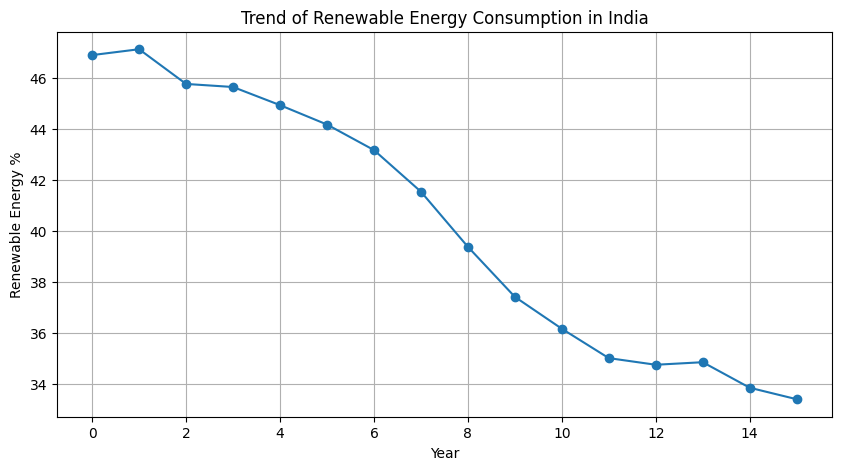

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df_india.index, df_india["Renewable energy consumption (% of total final energy consumption)"], marker='o')
plt.xlabel("Year")
plt.ylabel("Renewable Energy %")
plt.title("Trend of Renewable Energy Consumption in India")
plt.grid()
plt.show()

**FORECASTING FUTURE VALUES FOR PREDICTING THE FEATURES VALUE AND THAN APPLYING MODELLING TO PREDICT DATA FOR 2030**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Most Important features for predicting renewable energy consumption
features = [
    "GDP growth (annual %)",
    "Research and development expenditure (% of GDP)",
    "Government expenditure on education, total (% of government expenditure)",
    "Electric power consumption (kWh per capita)",
    "Access to electricity (% of population)",
    "Energy imports, net (% of energy use)",
    "Fossil fuel energy consumption (% of total)",
    "CO2 emissions (metric tons per capita)",
    "Energy intensity level of primary energy (MJ/$2017 PPP GDP)",
    "Renewable electricity output (% of total electricity output)"
]

forecasted_features = {}
for feature in features:

    model = ARIMA(df_india[feature], order=(2,1,2))  # (p,d,q) can be tuned
    model_fit = model.fit()
    # Forecasting next 15 years.
    forecasted_features[feature] = model_fit.forecast(steps=15).values

C:\Users\Ashutosh Gupta\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ashutosh Gupta\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashutosh Gupta\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ashutosh Gupta\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros a

In [ ]:
#NOW WE GOT THE APPRPRIATE FEATURES TO APPLY IN MODEL FOR PREDICTING RENEWABLE ENERGY CONSUMPTION FOR 2030
df_india_future=pd.concat([df_india[features],pd.DataFrame(forecasted_features)])
df_india_future.index=(i for i in range(2000,2031))
df_india_future.loc[2030:]

,GDP growth (annual %),Research and development expenditure (% of GDP),"Government expenditure on education, total (% of government expenditure)",Electric power consumption (kWh per capita),Access to electricity (% of population),"Energy imports, net (% of energy use)",Fossil fuel energy consumption (% of total),CO2 emissions (metric tons per capita),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Renewable electricity output (% of total electricity output)
2030,6.474485,0.67005,15.464772,954.344974,111.902258,36.135929,77.315323,1.829775,3.439154,14.887489


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = df_india[features]
y = df_india["Renewable energy consumption (% of total final energy consumption)"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print(model.score(X_test,y_test)*100,'%')

95.07609144499926 %


In [ ]:
model.predict(df_india_future.loc[2030:])

array([34.1404])

**THEREFORE ACCORDING TO ABOVE MODEL SEEING THE CURRENT GROWTH AND FEW SDG INDICATORS INDIA WILL HAVE 34.14 % CONSUMPTION ON RENEWABLE ENERGIES**

In [ ]:
#Predictive model to assess India’s ability to achieve 45% reduction in carbon intensity for 2005 levels.

In [ ]:
df_india[['CO2 emissions (metric tons per capita)']]

Indicators,CO2 emissions (metric tons per capita)
0,0.885079
1,0.883750
2,0.897240
3,0.905456
4,0.955473
5,0.984265
6,1.036538
7,1.123602
8,1.180359
9,1.278873


In [ ]:
features2 = [
    "Renewable energy consumption (% of total final energy consumption)",
    "GDP growth (annual %)",
    "Research and development expenditure (% of GDP)",
    "Government expenditure on education, total (% of government expenditure)",
    "Electric power consumption (kWh per capita)",
    "Access to electricity (% of population)",
    "Energy imports, net (% of energy use)",
    "Fossil fuel energy consumption (% of total)",
    "Energy intensity level of primary energy (MJ/$2017 PPP GDP)",
    "Renewable electricity output (% of total electricity output)"
]

forecasted_features2 = {}
for feature in features2:

    model = ARIMA(df_india[feature], order=(2,1,2))
    model_fit = model.fit()
    # Forecasting next 14 years
    forecasted_features2[feature] = model_fit.forecast(steps=15).values

C:\Users\Ashutosh Gupta\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ashutosh Gupta\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ashutosh Gupta\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ashutosh Gupta\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros a

In [ ]:
#NOW WE GOT THE APPRPRIATE FEATURES TO APPLY IN MODEL FOR PREDICTING CO2 Emsission FOR 2030
df_india_future2=pd.concat([df_india[features2],pd.DataFrame(forecasted_features2)])
df_india_future2.index=(i for i in range(2000,2031))
df_india_future2.loc[2030:]

,Renewable energy consumption (% of total final energy consumption),GDP growth (annual %),Research and development expenditure (% of GDP),"Government expenditure on education, total (% of government expenditure)",Electric power consumption (kWh per capita),Access to electricity (% of population),"Energy imports, net (% of energy use)",Fossil fuel energy consumption (% of total),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Renewable electricity output (% of total electricity output)
2030,28.60149,6.474485,0.67005,15.464772,954.344974,111.902258,36.135929,77.315323,3.439154,14.887489


In [ ]:
X = df_india[features2]
y = df_india["CO2 emissions (metric tons per capita)"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print(model.score(X_test,y_test)*100,'%')

95.94519426062712 %


**ABOVE MODEL'S ACCURACY IS 95.94%**

In [ ]:
model.predict(df_india_future2.loc[2030:])

array([1.57128925])

**THEREFORE ACCORDING TO ABOVE MODEL SEEING THE CURRENT GROWTH AND FEW SDG INDICATORS INDIA WILL HAVE 1.571 which 59.63 % more than 2005**

****************************************************************************************************************************

# **ROUND-2 (1st deliverable)**
## **FROM ABOVE WE KNOW BHUTAN AND GUATEMALA HAD A CHANGE IN CLUSTER (i.e. FROM '1' TO '0'(better) cluster)**
### **NOW ANALYZING WHICH OF THEM HAVE SHOWED MORE SIGNIFICANT GROWTH AND DOING FURTHER ANALYSIS**

In [ ]:
df_guatemala=imputed_df[imputed_df['Country Name']=='Guatemala']
df_guatemala

,Country Name,Country Code,2000_Access to clean fuels and technologies for cooking (% of population),2000_Access to electricity (% of population),"2000_Access to electricity, rural (% of rural population)","2000_Access to electricity, urban (% of urban population)",2000_Adjusted savings: natural resources depletion (% of GNI),2000_Adjusted savings: net forest depletion (% of GNI),2000_Age dependency ratio (% of working-age population),2000_Agricultural land (% of land area),...,"2015_School enrollment, primary (% gross)","2015_School enrollment, primary (gross), gender parity index (GPI)","2015_School enrollment, secondary (% gross)","2015_School enrollment, tertiary (% gross)",2015_Scientific and technical journal articles,2015_Total fisheries production (metric tons),"2015_Unemployment, female (% of female labor force) (modeled ILO estimate)","2015_Unemployment, total (% of total labor force) (modeled ILO estimate)",2015_Urban population (% of total population),2015_Women Business and the Law Index Score (scale 1-100)
66,Guatemala,GTM,40.55,73.318207,55.009254,95.397835,0.672746,0.357616,90.21511,44.43561,...,103.369871,0.97063,53.33695,30.591043,74.273333,37401.36,3.544,2.51,49.971,70.625


In [ ]:
df_guatemala.drop(['Country Name','Country Code'],axis=1,inplace=True)

C:\Users\Ashutosh Gupta\AppData\Local\Temp\ipykernel_28640\1518683696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_guatemala.drop(['Country Name','Country Code'],axis=1,inplace=True)


In [ ]:
df_long = df_guatemala.melt( var_name="Indicator_Year", value_name="Value")
df_long[['Year', 'Indicator']] = df_long['Indicator_Year'].str.split('_', n=1, expand=True)
df_long.drop(['Indicator_Year'],axis=1,inplace=True)
df_guatemala = df_long.pivot(index="Year", columns="Indicator", values="Value").reset_index()

In [ ]:
df_guatemala.drop(['Year'],axis=1,inplace=True)
df_guatemala.drop([0,1,2,3,4],inplace=True)
df_guatemala

Indicator,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adjusted savings: natural resources depletion (% of GNI),Adjusted savings: net forest depletion (% of GNI),Age dependency ratio (% of working-age population),Agricultural land (% of land area),Agricultural methane emissions (% of total),Agricultural nitrous oxide emissions (% of total),...,"School enrollment, primary (% gross)","School enrollment, primary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)","School enrollment, tertiary (% gross)",Scientific and technical journal articles,Total fisheries production (metric tons),"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Urban population (% of total population),Women Business and the Law Index Score (scale 1-100)
5,37.45,78.389206,64.649467,93.937164,0.697913,0.416522,84.551395,42.571855,48.901099,77.833753,...,109.072436,0.934137,40.156161,25.283711,33.003333,27987.00,3.450,3.051,46.913,68.125
6,37.30,83.730995,74.183777,94.406662,0.920572,0.351951,82.974974,40.126913,48.580786,77.468354,...,109.855275,0.938483,41.442238,25.398707,35.590000,33862.00,3.457,3.061,47.210,68.125
7,37.10,80.719406,68.341911,94.395409,1.055729,0.115578,81.331979,41.190743,50.156413,77.641278,...,110.754865,0.945493,43.280125,25.851569,36.703333,34365.00,3.500,3.109,47.508,68.125
8,37.10,81.893997,70.209938,94.649994,0.970251,0.000000,79.642193,38.615155,50.864700,75.590551,...,111.464737,0.952360,44.690225,26.396343,33.310000,42018.00,3.680,3.309,47.807,70.625
9,37.40,83.078529,72.107887,94.913979,0.642264,0.000000,77.912635,37.733669,50.864700,75.590551,...,113.041481,0.961147,46.080975,27.092866,39.930000,36772.00,3.860,3.512,48.104,70.625
10,38.10,84.275711,74.044868,95.181664,0.832013,0.000000,76.154190,36.973498,50.864700,75.590551,...,114.410182,0.970023,48.526271,27.673896,47.050000,45124.23,3.849,3.500,48.403,70.625
11,38.40,84.026413,73.985207,94.603279,1.279300,0.000000,74.415747,36.306644,50.864700,75.590551,...,114.959353,0.978393,50.886716,28.125908,50.460000,41312.51,3.616,3.085,48.701,70.625
12,39.20,86.718857,78.084709,95.705421,0.828371,0.000000,72.753794,35.546473,50.864700,75.590551,...,112.664711,0.980670,52.757376,28.614568,54.930000,33034.25,3.468,2.760,49.000,70.625
13,40.20,87.969292,80.204193,95.951385,0.608585,0.000000,71.160901,34.720978,50.864700,75.590551,...,109.507729,0.978237,53.046827,29.209046,62.133333,37448.39,3.659,3.020,49.311,70.625
14,41.60,85.494370,76.655952,94.463135,1.002487,0.000000,69.670961,35.403135,50.864700,75.590551,...,105.824669,0.973747,52.978961,29.923082,69.090000,39470.60,3.385,2.720,49.634,70.625


In [ ]:
df_bhutan=imputed_df[imputed_df['Country Name']=='Bhutan']
df_bhutan

,Country Name,Country Code,2000_Access to clean fuels and technologies for cooking (% of population),2000_Access to electricity (% of population),"2000_Access to electricity, rural (% of rural population)","2000_Access to electricity, urban (% of urban population)",2000_Adjusted savings: natural resources depletion (% of GNI),2000_Adjusted savings: net forest depletion (% of GNI),2000_Age dependency ratio (% of working-age population),2000_Agricultural land (% of land area),...,"2015_School enrollment, primary (% gross)","2015_School enrollment, primary (gross), gender parity index (GPI)","2015_School enrollment, secondary (% gross)","2015_School enrollment, tertiary (% gross)",2015_Scientific and technical journal articles,2015_Total fisheries production (metric tons),"2015_Unemployment, female (% of female labor force) (modeled ILO estimate)","2015_Unemployment, total (% of total labor force) (modeled ILO estimate)",2015_Urban population (% of total population),2015_Women Business and the Law Index Score (scale 1-100)
18,Bhutan,BTN,27.8,31.15,8.796516,96.739998,3.874847,3.857007,72.57517,14.522613,...,105.551231,1.011521,80.782946,13.049666,27.446667,156.0,3.254,2.45,38.678,71.875


In [ ]:
df_bhutan.drop(['Country Name','Country Code'],axis=1,inplace=True)

C:\Users\Ashutosh Gupta\AppData\Local\Temp\ipykernel_28640\3411314387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bhutan.drop(['Country Name','Country Code'],axis=1,inplace=True)


In [ ]:
df_bhutan

,2000_Access to clean fuels and technologies for cooking (% of population),2000_Access to electricity (% of population),"2000_Access to electricity, rural (% of rural population)","2000_Access to electricity, urban (% of urban population)",2000_Adjusted savings: natural resources depletion (% of GNI),2000_Adjusted savings: net forest depletion (% of GNI),2000_Age dependency ratio (% of working-age population),2000_Agricultural land (% of land area),2000_Agricultural methane emissions (% of total),2000_Agricultural nitrous oxide emissions (% of total),...,"2015_School enrollment, primary (% gross)","2015_School enrollment, primary (gross), gender parity index (GPI)","2015_School enrollment, secondary (% gross)","2015_School enrollment, tertiary (% gross)",2015_Scientific and technical journal articles,2015_Total fisheries production (metric tons),"2015_Unemployment, female (% of female labor force) (modeled ILO estimate)","2015_Unemployment, total (% of total labor force) (modeled ILO estimate)",2015_Urban population (% of total population),2015_Women Business and the Law Index Score (scale 1-100)
18,27.8,31.15,8.796516,96.739998,3.874847,3.857007,72.57517,14.522613,59.302326,64.705882,...,105.551231,1.011521,80.782946,13.049666,27.446667,156.0,3.254,2.45,38.678,71.875


In [ ]:
df_long = df_bhutan.melt( var_name="Indicator_Year", value_name="Value")
df_long[['Year', 'Indicator']] = df_long['Indicator_Year'].str.split('_', n=1, expand=True)
df_long.drop(['Indicator_Year'],axis=1,inplace=True)
df_bhutan = df_long.pivot(index="Year", columns="Indicator", values="Value").reset_index()

In [ ]:
df_bhutan.drop(['Year'],axis=1,inplace=True)
df_bhutan.drop([0,1,2,3,4],inplace=True)
df_bhutan

Indicator,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adjusted savings: natural resources depletion (% of GNI),Adjusted savings: net forest depletion (% of GNI),Age dependency ratio (% of working-age population),Agricultural land (% of land area),Agricultural methane emissions (% of total),Agricultural nitrous oxide emissions (% of total),...,"School enrollment, primary (% gross)","School enrollment, primary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)","School enrollment, tertiary (% gross)",Scientific and technical journal articles,Total fisheries production (metric tons),"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Urban population (% of total population),Women Business and the Law Index Score (scale 1-100)
5,47.30,59.808113,43.226292,96.776382,2.446920,2.400166,61.269492,15.557363,58.241758,66.666667,...,87.713847,0.963967,44.551102,5.039000,6.333333,65.00,3.331,3.100,30.965,51.875
6,51.10,59.685055,41.990677,97.787773,3.113633,3.060185,59.405054,15.137603,56.666667,61.111111,...,91.181028,0.978490,45.501344,5.127117,10.906667,60.00,3.800,3.130,31.712,51.875
7,54.65,71.800003,58.851982,98.730003,3.997330,3.942342,57.746925,14.770312,56.521739,61.111111,...,94.510221,0.985500,47.785954,5.349023,10.646667,55.00,4.701,3.700,32.469,66.875
8,57.80,67.555252,52.300190,98.199326,3.590784,3.457960,56.137408,13.676312,52.941176,58.823529,...,97.804957,0.997657,51.174310,5.922267,10.866667,56.00,4.921,3.655,33.236,66.875
9,61.20,71.503899,57.630772,98.422035,3.344223,3.318891,54.657723,13.642207,52.941176,58.823529,...,101.337837,1.007547,55.233000,6.318370,8.923333,54.00,5.530,3.960,34.010,66.875
10,63.90,73.282913,59.397781,99.305557,4.934622,4.879326,53.328711,13.642207,52.941176,58.823529,...,104.770826,1.017397,59.286850,6.719934,11.993333,52.00,4.054,3.320,34.793,69.375
11,66.70,81.767090,72.037247,99.379761,4.552379,4.490488,52.152500,13.631713,52.941176,58.823529,...,108.081891,1.018327,63.464389,7.172455,15.696667,79.00,4.868,3.230,35.585,69.375
12,68.90,91.500000,86.869965,99.599998,3.969690,3.919448,51.149006,13.631713,52.941176,58.823529,...,110.330821,1.017237,67.504215,7.683682,17.586667,80.34,2.214,2.050,36.371,69.375
13,71.20,87.451141,80.348946,99.467094,3.228201,3.203998,50.295688,13.631713,52.941176,58.823529,...,109.907041,1.012913,71.519605,9.014118,21.256667,72.80,3.760,2.870,37.149,71.875
14,72.90,91.483513,86.594826,99.487587,3.257501,3.244683,49.479208,13.789123,52.941176,58.823529,...,108.106987,1.012903,76.676315,11.016734,24.793333,144.00,3.606,2.630,37.918,71.875


**CHOOSING SOME IMPORTANT INDICATORS TO SHOWCASE PROGRESS OF BOTH COUNTRIES OVER THE YEARS AND COMPARING THEM**

**COMPARISONS BASED ON POSITIVE INDICATORS**

In [ ]:
important_indicators_positive = [
  'Access to clean fuels and technologies for cooking (% of population)',
  'Access to electricity, rural (% of rural population)',
  'Alternative and nuclear energy (% of total energy use)',
  'Forest area (% of land area)',
  'Life expectancy at birth, total (years)',
  'School enrollment, tertiary (% gross)'
]


<Figure size 1200x800 with 0 Axes>

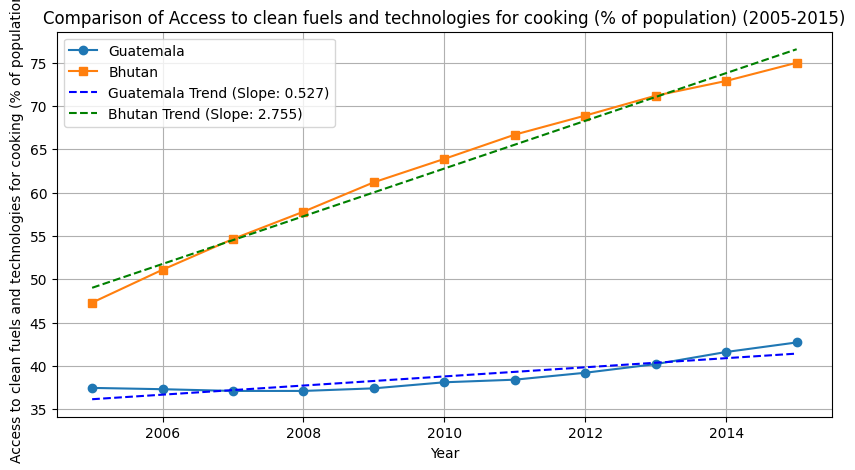

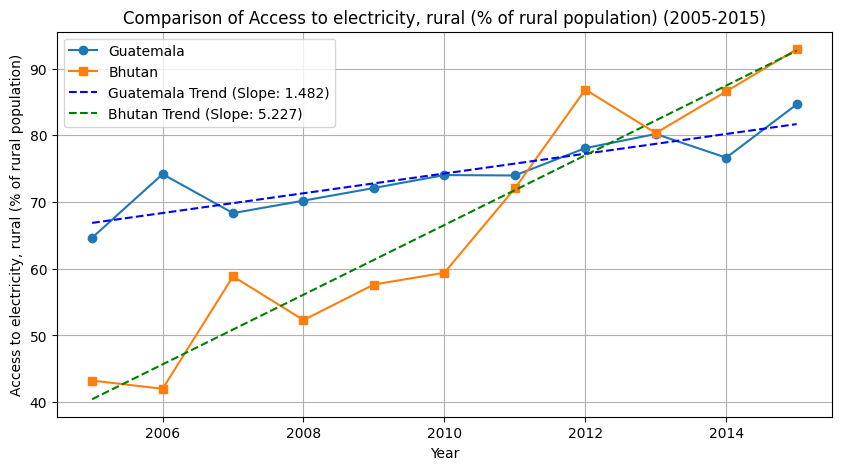

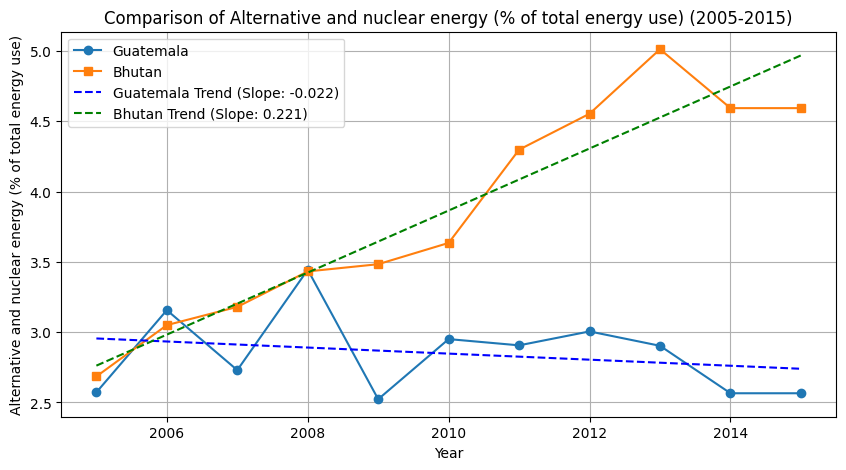

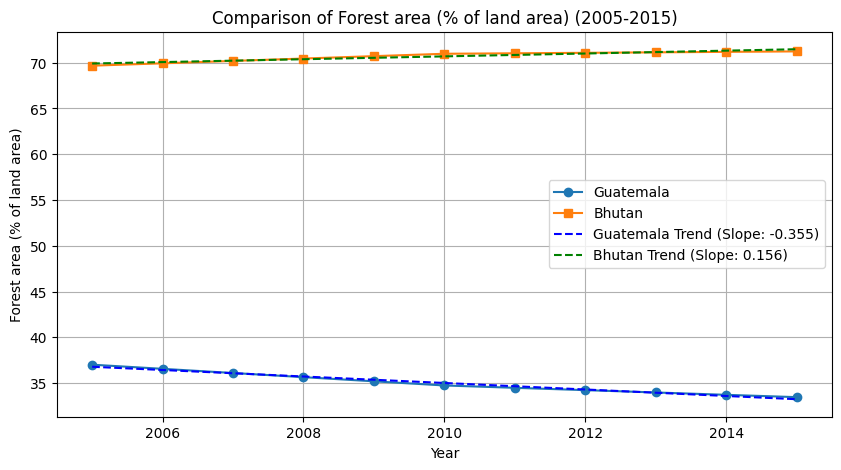

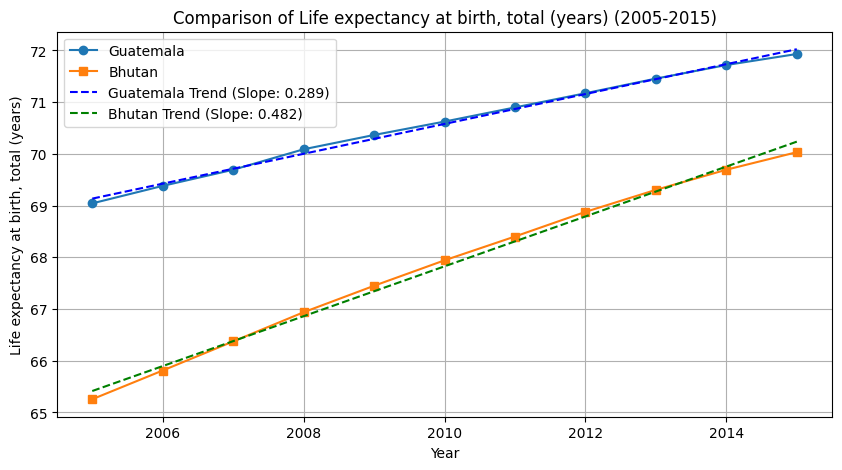

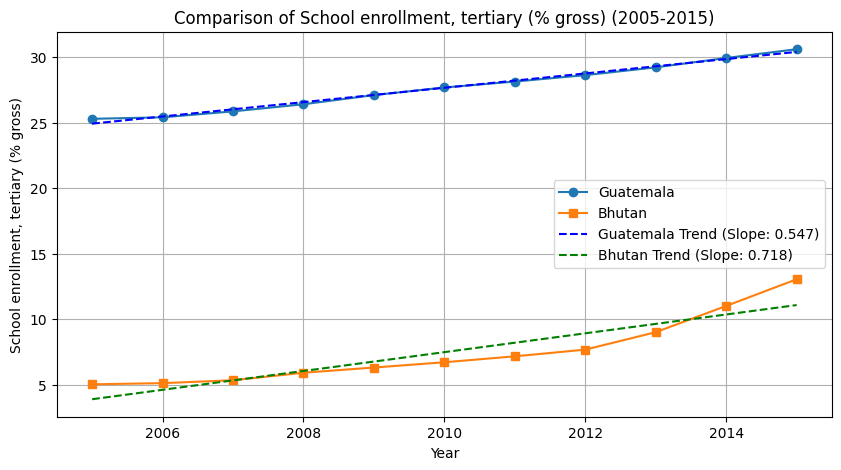

In [ ]:
from sklearn.linear_model import LinearRegression
df_guatemala.index = range(2005, 2016)
df_bhutan.index = range(2005, 2016)

# Selecting data for years 2005 to 2015
df_guatemala_filtered = df_guatemala.loc[2005:2015, important_indicators_positive]
df_bhutan_filtered = df_bhutan.loc[2005:2015, important_indicators_positive]

# Plotting line graphs with trendlines
plt.figure(figsize=(12, 8))

for indicator in important_indicators_positive:
    plt.figure(figsize=(10, 5))
    years = np.array(df_guatemala_filtered.index).reshape(-1, 1)

    # Using linear regression for both countries to show the progress through slopes of line graphs
    model_guatemala = LinearRegression().fit(years, df_guatemala_filtered[indicator])
    model_bhutan = LinearRegression().fit(years, df_bhutan_filtered[indicator])

    # Predicting values for trendline
    guatemala_trend = model_guatemala.predict(years)
    bhutan_trend = model_bhutan.predict(years)

    # Plotting actual data
    plt.plot(df_guatemala_filtered.index, df_guatemala_filtered[indicator], label="Guatemala", marker='o')
    plt.plot(df_bhutan_filtered.index, df_bhutan_filtered[indicator], label="Bhutan", marker='s')

    # Plotting trendlines
    plt.plot(df_guatemala_filtered.index, guatemala_trend, linestyle="dashed", color="blue", label=f"Guatemala Trend (Slope: {model_guatemala.coef_[0]:.3f})")
    plt.plot(df_bhutan_filtered.index, bhutan_trend, linestyle="dashed", color="green", label=f"Bhutan Trend (Slope: {model_bhutan.coef_[0]:.3f})")

    plt.title(f"Comparison of {indicator} (2005-2015)")
    plt.xlabel("Year")
    plt.ylabel(indicator)
    plt.legend()
    plt.grid(True)
    plt.show()

**COMPARISON BASED ON NEGATIVE INDICATORS**

In [ ]:
important_indicators_negative = [
  'Prevalence of undernourishment (% of population)',
  'Mortality rate, under-5 (per 1,000 live births)',
  'Children out of school (% of primary school age)',
  'Electricity production from coal sources (% of total)',
  'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
  'Unemployment, total (% of total labor force) (modeled ILO estimate)',
]

<Figure size 1200x800 with 0 Axes>

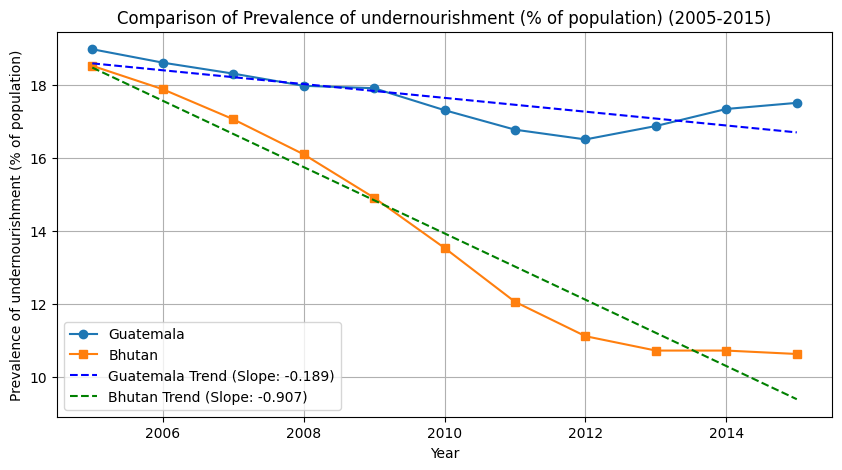

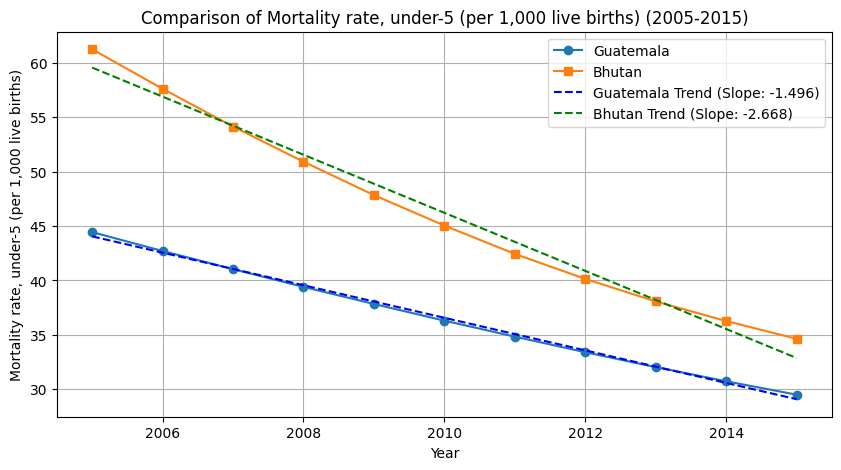

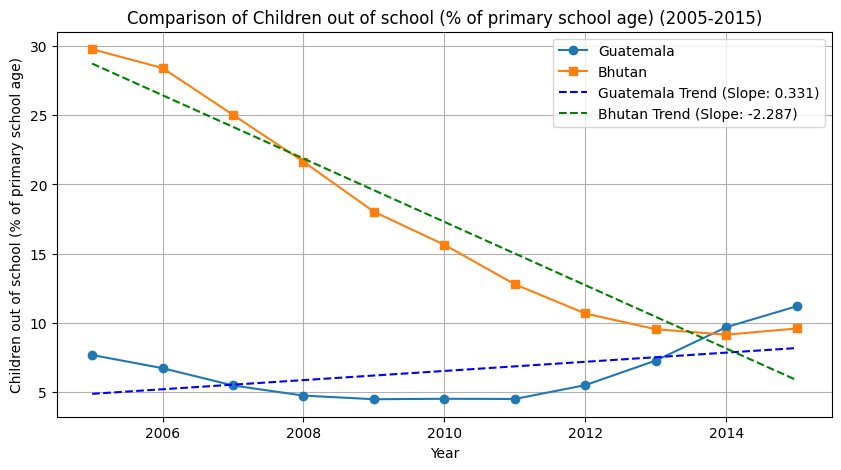

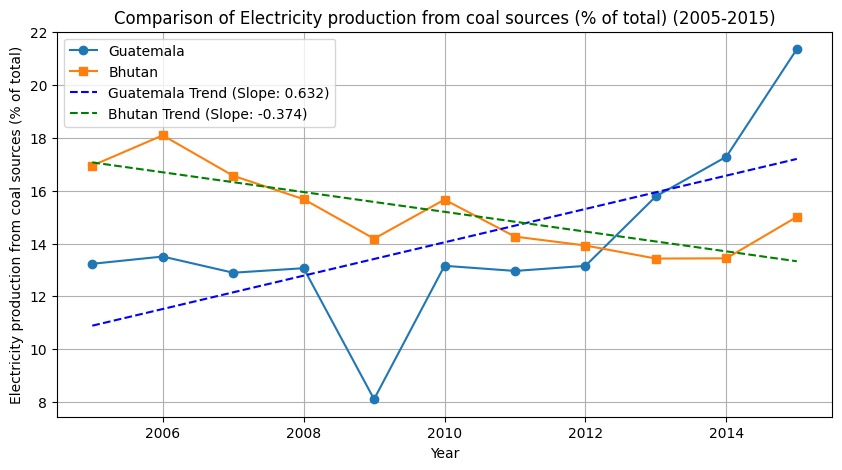

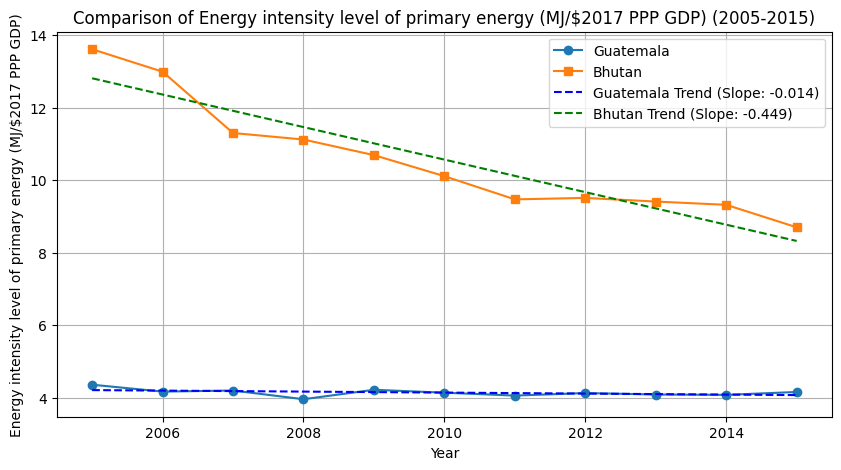

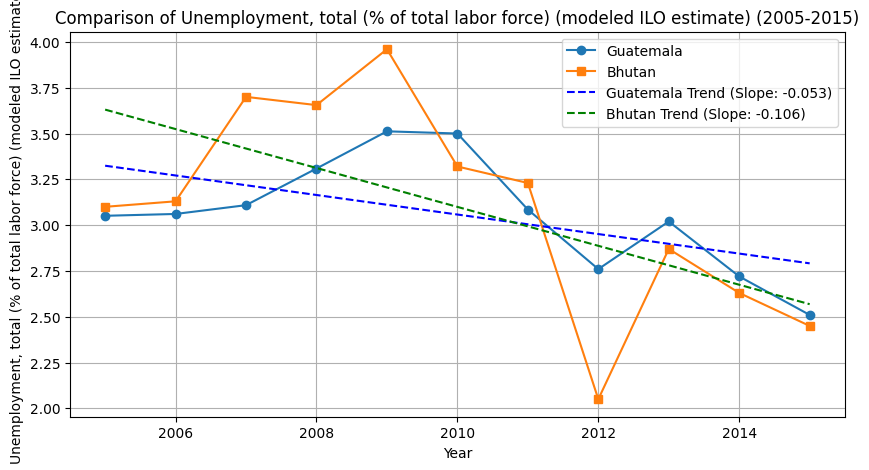

In [ ]:
from sklearn.linear_model import LinearRegression
df_guatemala.index = range(2005, 2016)
df_bhutan.index = range(2005, 2016)

# Selecting data for years 2005 to 2015
df_guatemala_filtered = df_guatemala.loc[2005:2015, important_indicators_negative]
df_bhutan_filtered = df_bhutan.loc[2005:2015, important_indicators_negative]

# Plotting line graphs with trendlines
plt.figure(figsize=(12, 8))

for indicator in important_indicators_negative:
    plt.figure(figsize=(10, 5))
    years = np.array(df_guatemala_filtered.index).reshape(-1, 1)

    # Using linear regression for both countries to show the progress through slopes of line graphs
    model_guatemala = LinearRegression().fit(years, df_guatemala_filtered[indicator])
    model_bhutan = LinearRegression().fit(years, df_bhutan_filtered[indicator])

    # Predicting values for trendline
    guatemala_trend = model_guatemala.predict(years)
    bhutan_trend = model_bhutan.predict(years)
    # Plotting actual data
    plt.plot(df_guatemala_filtered.index, df_guatemala_filtered[indicator], label="Guatemala", marker='o')
    plt.plot(df_bhutan_filtered.index, df_bhutan_filtered[indicator], label="Bhutan", marker='s')

    # Plotting trendlines
    plt.plot(df_guatemala_filtered.index, guatemala_trend, linestyle="dashed", color="blue", label=f"Guatemala Trend (Slope: {model_guatemala.coef_[0]:.3f})")
    plt.plot(df_bhutan_filtered.index, bhutan_trend, linestyle="dashed", color="green", label=f"Bhutan Trend (Slope: {model_bhutan.coef_[0]:.3f})")

    plt.title(f"Comparison of {indicator} (2005-2015)")
    plt.xlabel("Year")
    plt.ylabel(indicator)
    plt.legend()
    plt.grid(True)
    plt.show()


 **IT IS EVIDENT FROM ABOVE THAT BHUTAN HAS SHOWED MORE PROGRESS WITH RESPECT TO GUATEMALA AND THEREFORE FURTHER ANALYSIS WILL BE BASED ON BHUTAN**

# **Classification based on different SDG indicators where bhutan has showed progress:**

# **SDG 1: No Poverty**

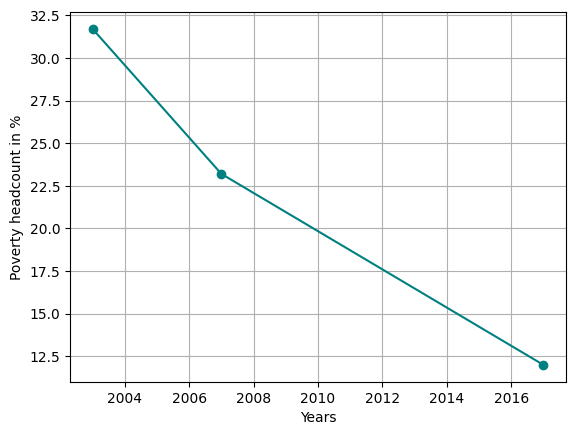

In [ ]:
#  THE DATA THAT IS USED WAS IN GIVEN DATASET ONLY
# BUT THE INDICATROS WERE REMOVED SINCE THESE INDICATORS DONT HAVE YEAR ON YEAR VALUE AND ARE CALCULATED ON A 5 YEAR TERM
x=np.array([2003,2007,2017])
y=np.array([31.7,23.2,12])
plt.plot(x,y,marker='o',color='teal')
plt.ylabel('Poverty headcount in %')
plt.xlabel('Years')
plt.grid()

# **SDG 2: Zero Hunger**

In [ ]:
hunger_indicator=['Prevalence of undernourishment (% of population)']

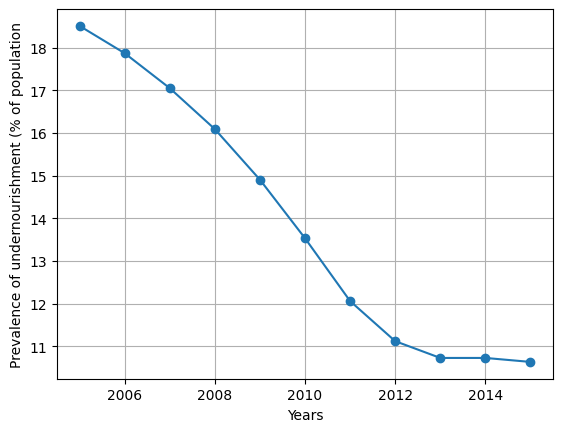

In [ ]:
plt.plot(df_bhutan.index,df_bhutan[hunger_indicator],marker='o')
plt.xlabel('Years')
plt.ylabel('Prevalence of undernourishment (% of population')
plt.grid()

# **SDG 3: Good Health and Well-being**

In [ ]:
health_indicators=['Life expectancy at birth, total (years)','Incidence of HIV, all (per 1,000 uninfected population)','Mortality rate, under-5 (per 1,000 live births)']

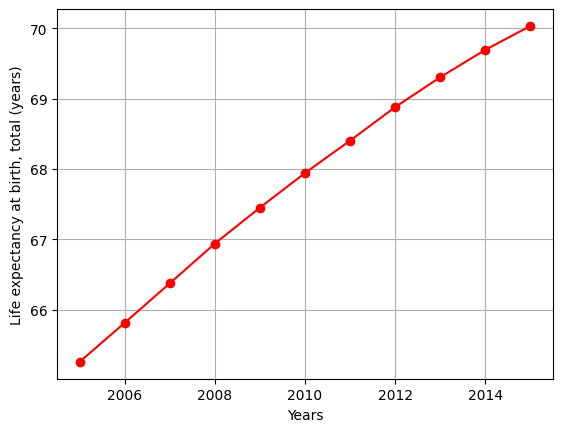

In [ ]:
plt.plot(df_bhutan.index,df_bhutan[health_indicators[0]],marker='o',color='r')
plt.xlabel('Years')
plt.ylabel(health_indicators[0])
plt.grid()

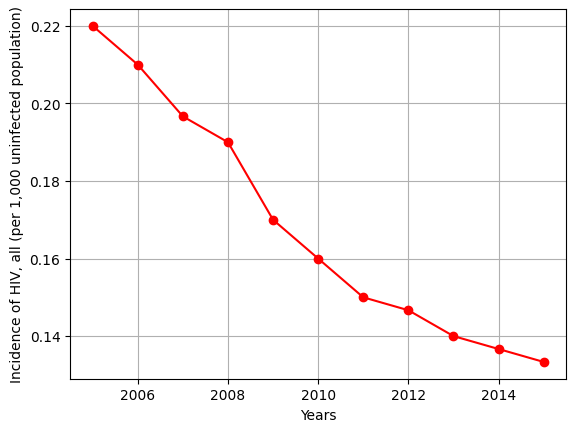

In [ ]:
plt.plot(df_bhutan.index,df_bhutan[health_indicators[1]],marker='o',color='r')
plt.xlabel('Years')
plt.ylabel(health_indicators[1])
plt.grid()

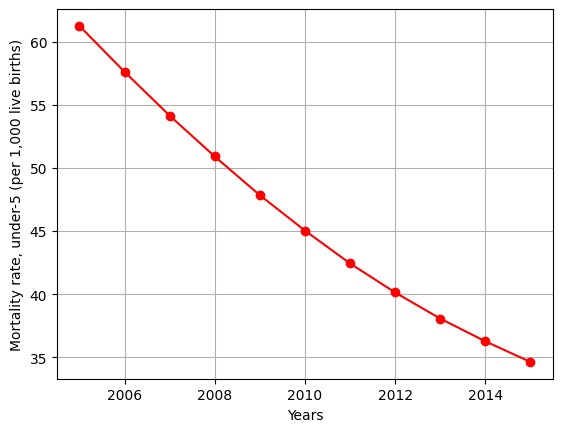

In [ ]:
plt.plot(df_bhutan.index,df_bhutan[health_indicators[2]],marker='o',color='red')
plt.xlabel('Years')
plt.ylabel(health_indicators[2])
plt.grid()

# **SDG 4: Quality Education**

In [ ]:
edu_indicators=['School enrollment, tertiary (% gross)','Children out of school (% of primary school age)']

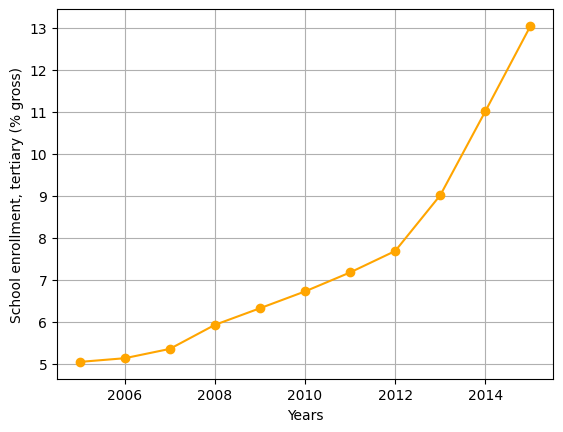

In [ ]:
plt.plot(df_bhutan.index,df_bhutan[edu_indicators[0]],marker='o',color='orange')
plt.xlabel('Years')
plt.ylabel(edu_indicators[0])
plt.grid()

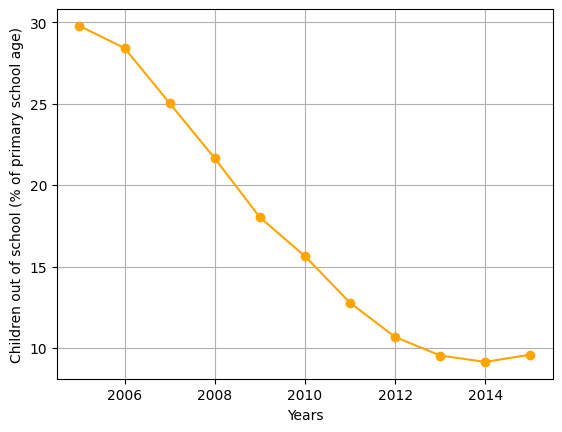

In [ ]:
plt.plot(df_bhutan.index,df_bhutan[edu_indicators[1]],marker='o',color='orange')
plt.xlabel('Years')
plt.ylabel(edu_indicators[1])
plt.grid()

# **SDG 6: Clean Water and Sanitation**

In [ ]:
sanitation_indicator=['People practicing open defecation (% of population)']

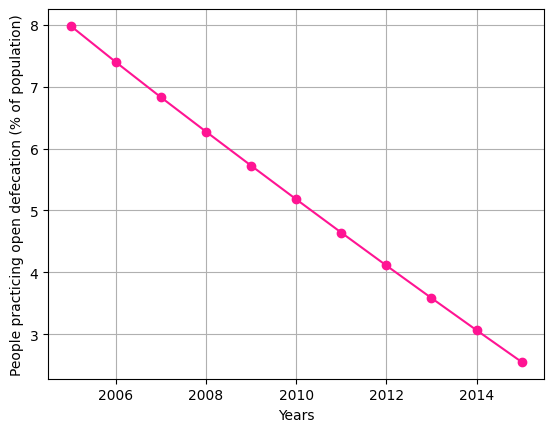

In [ ]:
plt.plot(df_bhutan.index,df_bhutan[sanitation_indicator],marker='o',color='deeppink')
plt.xlabel('Years')
plt.ylabel('People practicing open defecation (% of population)')
plt.grid()

# **SDG 7: Affordable and Clean Energy**

In [ ]:
energy_indicators=['Access to clean fuels and technologies for cooking (% of population)','Access to electricity, rural (% of rural population)','Alternative and nuclear energy (% of total energy use)','Electricity production from renewable sources, excluding hydroelectric (% of total)','Energy imports, net (% of energy use)','Electricity production from coal sources (% of total)','Electricity production from oil sources (% of total)','Energy intensity level of primary energy (MJ/$2017 PPP GDP)']

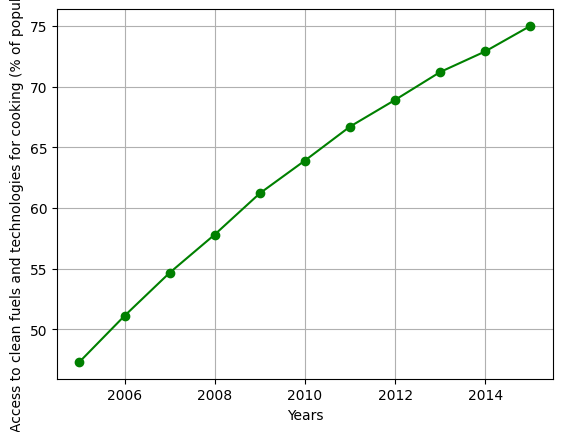

In [ ]:
plt.plot(df_bhutan.index,df_bhutan[energy_indicators[0]],marker='o',color='green')
plt.xlabel('Years')
plt.ylabel(energy_indicators[0])
plt.grid()

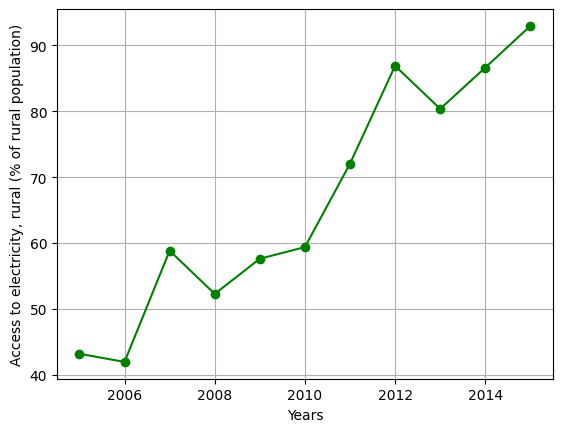

In [ ]:
plt.plot(df_bhutan.index,df_bhutan[energy_indicators[1]],marker='o',color='green')
plt.xlabel('Years')
plt.ylabel(energy_indicators[1])
plt.grid()

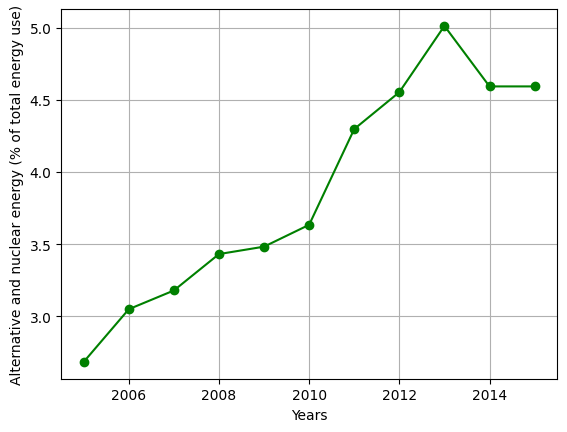

In [ ]:
plt.plot(df_bhutan.index,df_bhutan[energy_indicators[2]],marker='o',color='green')
plt.xlabel('Years')
plt.ylabel(energy_indicators[2])
plt.grid()

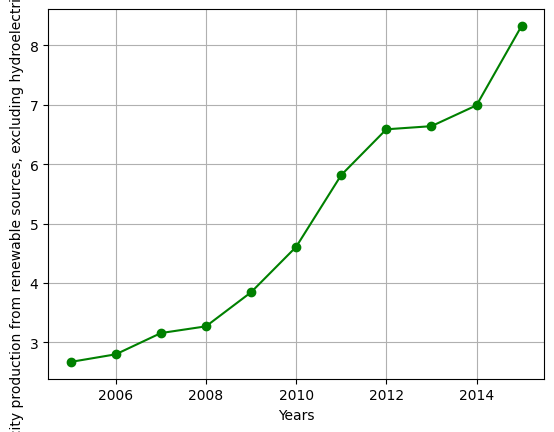

In [ ]:
plt.plot(df_bhutan.index,df_bhutan[energy_indicators[3]],marker='o',color='green')
plt.xlabel('Years')
plt.ylabel(energy_indicators[3])
plt.grid()

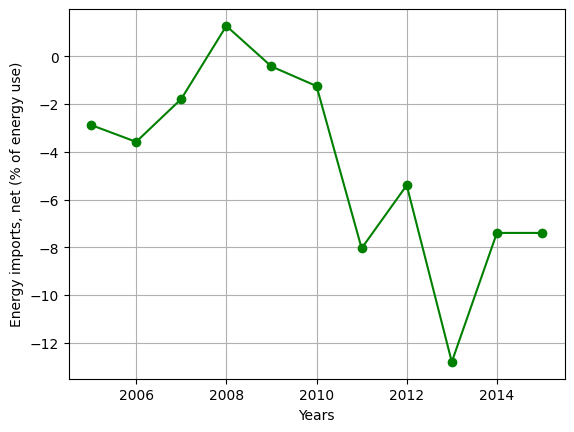

In [ ]:
plt.plot(df_bhutan.index,df_bhutan[energy_indicators[4]],marker='o',color='green')
plt.xlabel('Years')
plt.ylabel(energy_indicators[4])
plt.grid()

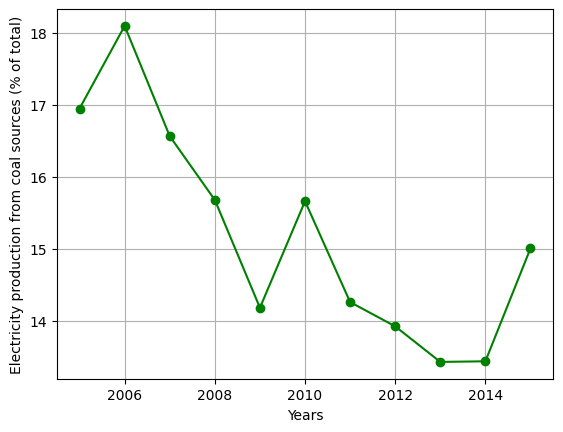

In [ ]:
plt.plot(df_bhutan.index,df_bhutan[energy_indicators[5]],marker='o',color='green')
plt.xlabel('Years')
plt.ylabel(energy_indicators[5])
plt.grid()

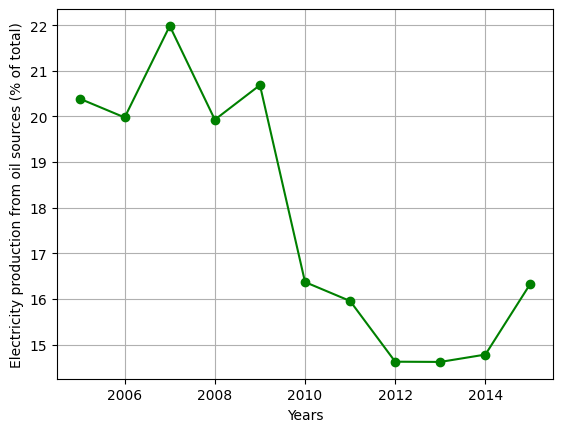

In [ ]:
plt.plot(df_bhutan.index,df_bhutan[energy_indicators[6]],marker='o',color='green')
plt.xlabel('Years')
plt.ylabel(energy_indicators[6])
plt.grid()

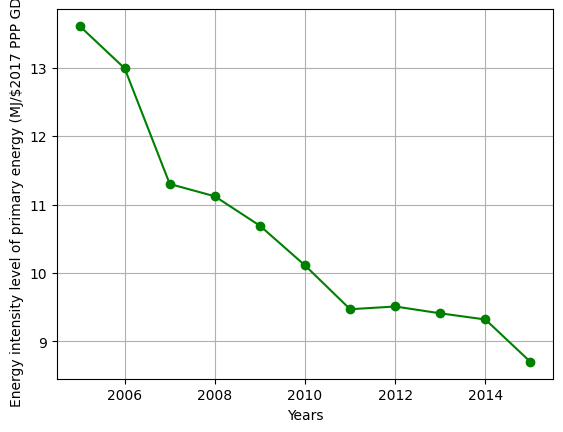

In [ ]:
plt.plot(df_bhutan.index,df_bhutan[energy_indicators[7]],marker='o',color='green')
plt.xlabel('Years')
plt.ylabel(energy_indicators[7])
plt.grid()

# **SDG 8: Decent Work and Economic Growth**

In [ ]:
work_indicator='Unemployment, total (% of total labor force) (modeled ILO estimate)'

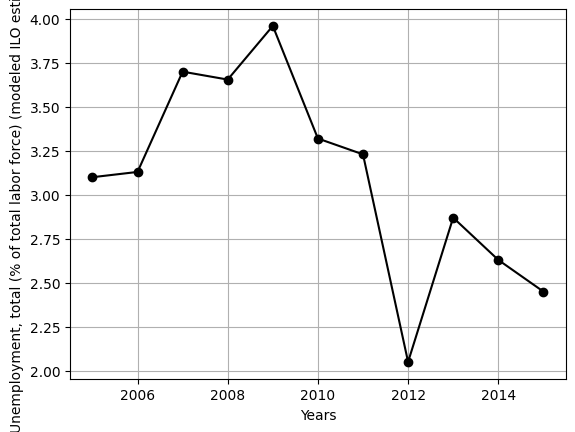

In [ ]:
plt.plot(df_bhutan.index,df_bhutan[work_indicator],marker='o',color='black')
plt.xlabel('Years')
plt.ylabel(work_indicator)
plt.grid()


# **SDG 11: Sustainable Cities and Communities**

In [ ]:
sustainable_indicator='PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'

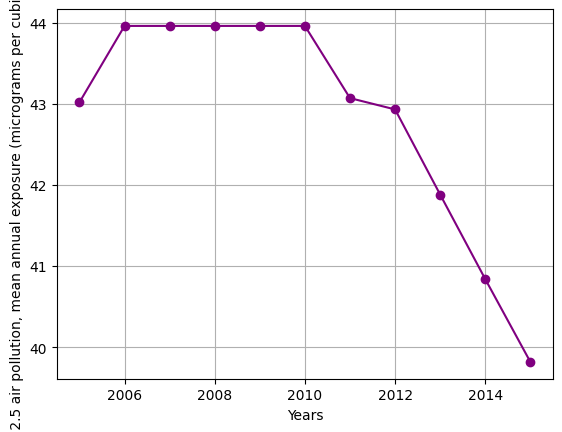

In [ ]:
plt.plot(df_bhutan.index,df_bhutan[sustainable_indicator],marker='o',color='purple')
plt.xlabel('Years')
plt.ylabel(sustainable_indicator)
plt.grid()


# **SDG 13: Climate Action**

In [ ]:
climate_indicator='Nitrous oxide emissions (thousand metric tons of CO2 equivalent)'

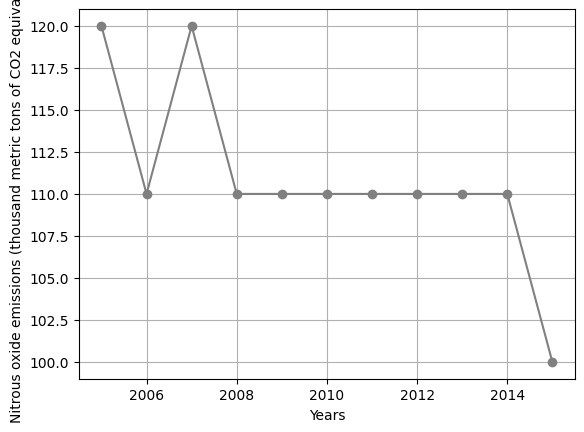

In [ ]:
plt.plot(df_bhutan.index,df_bhutan[climate_indicator],marker='o',color='grey')
plt.xlabel('Years')
plt.ylabel(climate_indicator)
plt.grid()


# **SDG 15: Life on Land**

In [ ]:
land_indicator='Forest area (% of land area)'

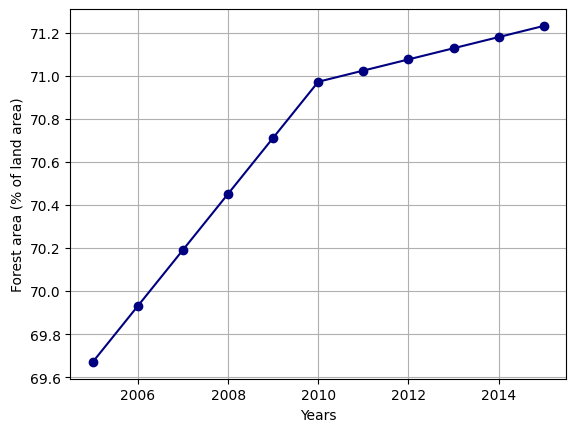

In [ ]:
plt.plot(df_bhutan.index,df_bhutan[land_indicator],marker='o',color='navy')
plt.xlabel('Years')
plt.ylabel(land_indicator)
plt.grid()

*************************************

# **ROUND-2 (2nd deliverable)**

In [ ]:
df_india

Indicators,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adjusted savings: natural resources depletion (% of GNI),Adjusted savings: net forest depletion (% of GNI),Age dependency ratio (% of working-age population),Agricultural land (% of land area),Agricultural methane emissions (% of total),Agricultural nitrous oxide emissions (% of total),...,"School enrollment, secondary (% gross)","School enrollment, tertiary (% gross)",Scientific and technical journal articles,"Secondary education, teachers, female",Total fisheries production (metric tons),"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Urban population (% of total population),Vitamin A supplementation coverage rate (% of children ages 6-59 months),Women Business and the Law Index Score (scale 1-100)
0,22.30,58.721474,47.235325,88.751030,1.472196,0.343284,65.408167,60.868966,77.489177,89.334513,...,44.871979,9.508720,21770.720000,723857.0,5668958.00,6.026,5.561,27.667,10.0,60.00
1,23.40,55.799999,43.483578,87.599998,1.234784,0.331257,64.553243,60.704832,77.077518,89.005405,...,45.011839,9.601610,22359.150000,741944.0,5937726.00,6.014,5.576,27.918,23.0,60.00
2,24.70,62.299999,51.474499,89.803001,1.284418,0.374538,63.703789,60.729385,76.239841,88.051368,...,45.699046,9.793214,23190.590000,805673.0,5973298.00,5.944,5.530,28.244,30.0,60.00
3,25.90,64.047485,53.532608,90.333946,1.211549,0.341928,62.850414,60.624783,75.980351,87.956655,...,47.283403,10.165430,25032.320000,868260.0,6074846.00,6.022,5.643,28.572,34.0,60.00
4,27.30,64.400002,53.636147,90.877449,1.419462,0.244575,61.962321,60.667162,75.684231,87.806017,...,49.356786,10.578334,27165.676667,877273.0,6230871.00,5.982,5.629,28.903,35.0,60.00
5,28.60,67.579811,57.722305,91.440468,1.800222,0.210349,61.057335,60.583414,75.661188,87.852269,...,51.655319,10.746073,30053.216667,1567810.0,6698487.99,5.939,5.613,29.235,49.0,60.00
6,29.50,67.900002,57.320301,93.099998,2.094620,0.284243,60.120965,60.509419,75.554992,87.888668,...,53.407949,11.033070,33793.030000,1567810.0,7060154.00,5.904,5.601,29.569,25.0,60.00
7,30.55,71.119865,61.939899,92.635971,2.402737,0.303437,59.155016,60.413226,75.563781,87.895143,...,55.375956,11.764227,38552.946667,1567810.0,7005055.00,5.852,5.572,29.906,36.0,60.00
8,32.00,72.899384,64.071182,93.259178,3.303583,0.301543,58.205611,60.459305,75.387808,87.651849,...,57.505100,13.220083,43713.620000,1567810.0,7984490.00,5.681,5.414,30.246,57.0,60.00
9,34.00,75.000000,65.702232,96.099998,1.625350,0.261520,57.281108,60.563906,75.387808,87.651849,...,59.082005,14.734940,49141.053333,1567810.0,7893598.00,5.772,5.544,30.587,68.0,60.00


In [ ]:
df_india.index=df_india.index+2000
df_india

Indicators,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adjusted savings: natural resources depletion (% of GNI),Adjusted savings: net forest depletion (% of GNI),Age dependency ratio (% of working-age population),Agricultural land (% of land area),Agricultural methane emissions (% of total),Agricultural nitrous oxide emissions (% of total),...,"School enrollment, secondary (% gross)","School enrollment, tertiary (% gross)",Scientific and technical journal articles,"Secondary education, teachers, female",Total fisheries production (metric tons),"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Urban population (% of total population),Vitamin A supplementation coverage rate (% of children ages 6-59 months),Women Business and the Law Index Score (scale 1-100)
2000,22.30,58.721474,47.235325,88.751030,1.472196,0.343284,65.408167,60.868966,77.489177,89.334513,...,44.871979,9.508720,21770.720000,723857.0,5668958.00,6.026,5.561,27.667,10.0,60.00
2001,23.40,55.799999,43.483578,87.599998,1.234784,0.331257,64.553243,60.704832,77.077518,89.005405,...,45.011839,9.601610,22359.150000,741944.0,5937726.00,6.014,5.576,27.918,23.0,60.00
2002,24.70,62.299999,51.474499,89.803001,1.284418,0.374538,63.703789,60.729385,76.239841,88.051368,...,45.699046,9.793214,23190.590000,805673.0,5973298.00,5.944,5.530,28.244,30.0,60.00
2003,25.90,64.047485,53.532608,90.333946,1.211549,0.341928,62.850414,60.624783,75.980351,87.956655,...,47.283403,10.165430,25032.320000,868260.0,6074846.00,6.022,5.643,28.572,34.0,60.00
2004,27.30,64.400002,53.636147,90.877449,1.419462,0.244575,61.962321,60.667162,75.684231,87.806017,...,49.356786,10.578334,27165.676667,877273.0,6230871.00,5.982,5.629,28.903,35.0,60.00
2005,28.60,67.579811,57.722305,91.440468,1.800222,0.210349,61.057335,60.583414,75.661188,87.852269,...,51.655319,10.746073,30053.216667,1567810.0,6698487.99,5.939,5.613,29.235,49.0,60.00
2006,29.50,67.900002,57.320301,93.099998,2.094620,0.284243,60.120965,60.509419,75.554992,87.888668,...,53.407949,11.033070,33793.030000,1567810.0,7060154.00,5.904,5.601,29.569,25.0,60.00
2007,30.55,71.119865,61.939899,92.635971,2.402737,0.303437,59.155016,60.413226,75.563781,87.895143,...,55.375956,11.764227,38552.946667,1567810.0,7005055.00,5.852,5.572,29.906,36.0,60.00
2008,32.00,72.899384,64.071182,93.259178,3.303583,0.301543,58.205611,60.459305,75.387808,87.651849,...,57.505100,13.220083,43713.620000,1567810.0,7984490.00,5.681,5.414,30.246,57.0,60.00
2009,34.00,75.000000,65.702232,96.099998,1.625350,0.261520,57.281108,60.563906,75.387808,87.651849,...,59.082005,14.734940,49141.053333,1567810.0,7893598.00,5.772,5.544,30.587,68.0,60.00


# *Important Indicators for predicting the possibilty of india achieving its goals till 2070 and knowing the current situation of india through visualization*

In [ ]:
emission_indicators = [
        "Renewable energy consumption (% of total final energy consumption)",
        "Renewable electricity output (% of total electricity output)",
        "Electricity production from renewable sources, excluding hydroelectric (% of total)",
        "Electricity production from hydroelectric sources (% of total)",
        "Electric power consumption (kWh per capita)",
        "Energy imports, net (% of energy use)",
        "CO2 emissions (kt)",
        "CO2 emissions (metric tons per capita)",
        "CO2 emissions from electricity and heat production, total (% of total fuel combustion)",
        "CO2 emissions from manufacturing industries and construction (% of total fuel combustion)",
        "CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)",
        "CO2 emissions from transport (% of total fuel combustion)",
        "Methane emissions in energy sector (thousand metric tons of CO2 equivalent)",
        "Nitrous oxide emissions (thousand metric tons of CO2 equivalent)",
        "PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",
        "Forest area (% of land area)",
        "Adjusted savings: net forest depletion (% of GNI)",
        "Adjusted savings: natural resources depletion (% of GNI)",
        "Agricultural land (% of land area)",
        "GDP growth (annual %)",
        "Fossil fuel energy consumption (% of total)",
        "Research and development expenditure (% of GDP)",
        "Patent applications, residents"

]


In [ ]:
# Converting 'Year' column to datetime format
df_india.index= pd.to_datetime(df_india.index, format='%Y')

# **UNDERSTANING THE SITUATION OF INDIA BETWEEN THE YEARS 2000 TO 2015 FOR THE ABOVE INDICATORS THROUGH VISUALIZATION**

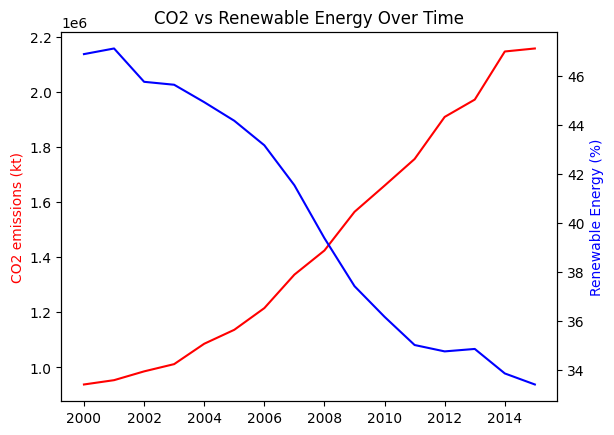

In [ ]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()  # Create a second y-axis

ax1.plot(df_india.index, df_india["CO2 emissions (kt)"], color='red', label="CO2 emissions")
ax2.plot(df_india.index, df_india["Renewable energy consumption (% of total final energy consumption)"], color='blue', label="Renewables")

ax1.set_ylabel("CO2 emissions (kt)", color="red")
ax2.set_ylabel("Renewable Energy (%)", color="blue")

plt.title("CO2 vs Renewable Energy Over Time")
plt.show()


# CO2 Emissions vs Renewable Energy Consumption Over Time

### Conclusions:
1. **Diverging Trends**: The graph shows a clear divergence where CO2 emissions are rising while renewable energy consumption is declining. This indicates a growing reliance on fossil fuels.
2. **Environmental Impact**: The increase in CO2 emissions suggests a negative impact on the environment, potentially leading to higher global warming and climate change effects.
3. **Policy and Market Dynamics**: The decline in renewable energy consumption may reflect insufficient policy support, market challenges, or a lack of investment in renewable energy infrastructure.
4. **Urgency for Action**: The data underscores the urgent need for stronger policies and incentives to boost renewable energy adoption and curb CO2 emissions to meet climate goals.

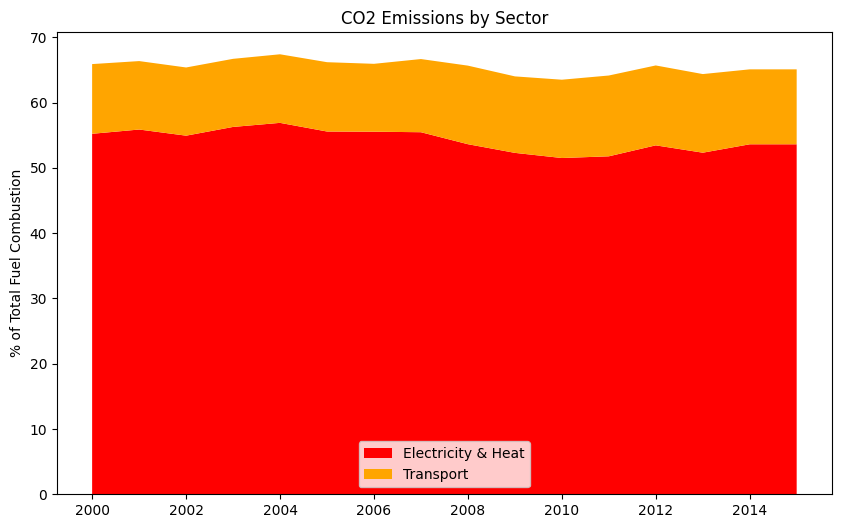

In [ ]:
plt.figure(figsize=(10, 6))
plt.stackplot(df_india.index,
              df_india['CO2 emissions from electricity and heat production, total (% of total fuel combustion)'],
              df_india['CO2 emissions from transport (% of total fuel combustion)'],
              labels=['Electricity & Heat', 'Transport'],
              colors=['red', 'orange'])
plt.title("CO2 Emissions by Sector")
plt.ylabel("% of Total Fuel Combustion")
plt.legend()
plt.show()

# CO2 Emissions by Sector

## % of Total Fuel Combustion

- **Years Tracked**: 2000, 2002, 2004, 2006, 2008, 2010
- **Focus**: Sector-wise contribution to CO2 emissions from fuel combustion.

### Conclusions:
1. **Trend Analysis**: The graph likely shows fluctuations in CO2 emissions across different sectors over the decade. Significant changes indicate shifts in industrial activities, energy consumption patterns, or policy impacts.
2. **Sector Contributions**: Certain sectors (e.g., energy, transportation) are expected to dominate emissions, reflecting their reliance on fossil fuels.
3. **Policy Impact**: Changes in emissions around specific years (e.g., 2006-2010) may correlate with environmental regulations or technological advancements.
4. **Global Context**: The data underscores the need for targeted strategies to reduce emissions in high-contributing sectors to meet climate goals.

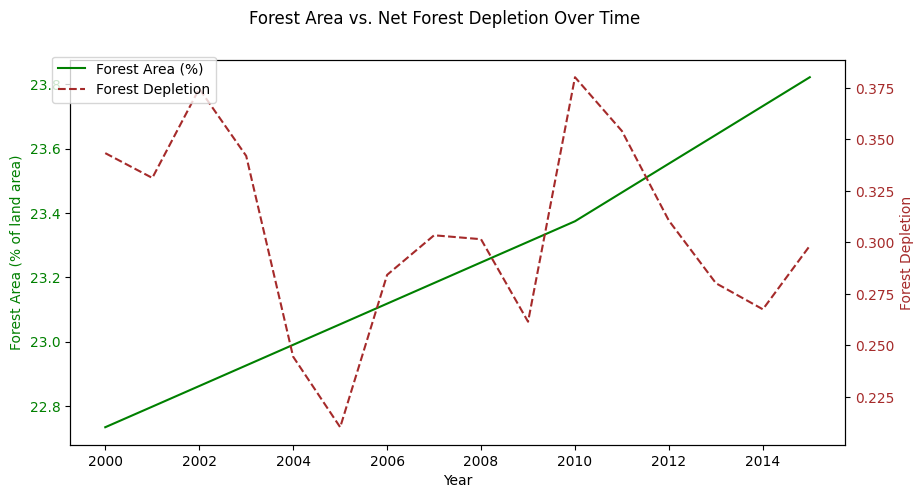

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,5))

# Plot Forest Area on Primary Y-axis
ax1.set_xlabel("Year")
ax1.set_ylabel("Forest Area (% of land area)", color="green")
ax1.plot(df_india.index, df_india["Forest area (% of land area)"], color='green', label="Forest Area (%)")
ax1.tick_params(axis="y", labelcolor="green")

# Create Secondary Y-axis for Net Forest Depletion
ax2 = ax1.twinx()
ax2.set_ylabel("Forest Depletion", color="brown")
ax2.plot(df_india.index, df_india["Adjusted savings: net forest depletion (% of GNI)"], color='brown', linestyle='dashed', label="Forest Depletion")
ax2.tick_params(axis="y", labelcolor="brown")

# Title and Legends
fig.suptitle("Forest Area vs. Net Forest Depletion Over Time")
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

plt.show()


# Analysis of Fluctuations in India's Net Forest Depletion

The fluctuations in **Net Forest Depletion** over the years can be attributed to several factors:

- **Agricultural Expansion** : Conversion of forest land for farming.  
- **Logging Activities** : Both legal and illegal logging impact forest cover.  
- **Forest Fires** : Natural and human-induced fires lead to sudden forest loss.  
- **Infrastructure Development** : Urban expansion, roads, and industries clear forests.  
- **Policy and Conservation Efforts** : Government initiatives and afforestation programs influence trends.  

These factors collectively contribute to the observed variations in forest depletion data.


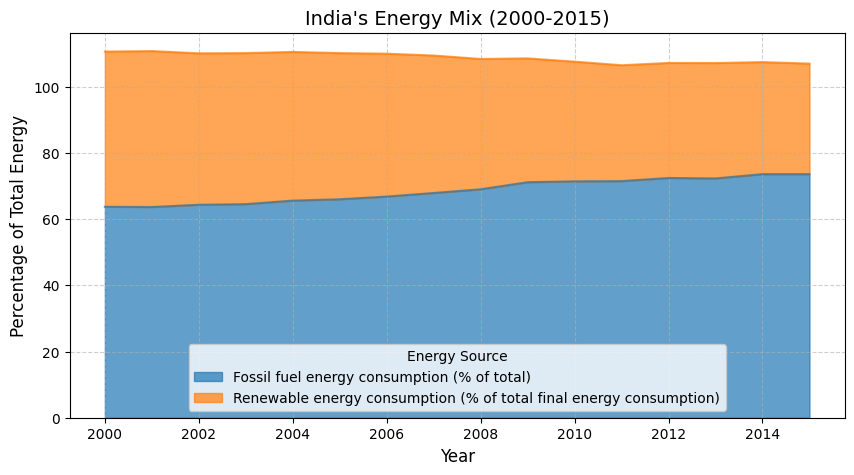

In [ ]:
import matplotlib.pyplot as plt

# Selecting relevant columns
energy_sources = ["Fossil fuel energy consumption (% of total)",
                  "Renewable energy consumption (% of total final energy consumption)"]

df_india.index = df_india.index.year
df_energy = df_india.loc[2000:2015, energy_sources]

# Plot stacked area chart
fig, ax = plt.subplots(figsize=(10, 5))
df_energy.plot(kind="area", stacked=True, alpha=0.7, ax=ax)

# Formatting
ax.set_title("India's Energy Mix (2000-2015)", fontsize=14)
ax.set_ylabel("Percentage of Total Energy", fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.legend(title="Energy Source", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# India's Energy Mix (2000-2015)

### Conclusions:
1. **Dominance of Fossil Fuels**: Fossil fuels likely constitute the majority of India's energy mix throughout the period, reflecting a heavy reliance on coal, oil, and natural gas.
2. **Renewable Energy Share**: Renewable energy consumption, while present, is significantly lower compared to fossil fuels, indicating slower adoption of clean energy sources.
3. **Trends Over Time**: The graph may show a gradual increase in renewable energy consumption over the years, but fossil fuels remain dominant, suggesting challenges in transitioning to a greener energy mix.
4. **Policy Implications**: The data highlights the need for stronger policies and investments to accelerate renewable energy adoption and reduce dependency on fossil fuels for sustainable development.

# **DOING TIME-SERIES ANALYSIS USING 'ARIMA' AND 'KAYA IDENTITY' TO FIND THE POTENTIAL OF INDIA TO HAVE ZERO EMSISSION TILL 2070**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

kaya_factors = {
    "Population": "Population, total",
    "GDP per capita": "GDP growth (annual %)",
    "Energy Intensity": "Energy intensity level of primary energy (MJ/$2017 PPP GDP)",
    "Carbon Intensity": "CO2 emissions (kt)",
}

# Define new data for 2015-2030
years_future = list(range(2015, 2031))
population_future = [1.324309e+09,1.534309e+09, 1.546824e+09, 1.559159e+09, 1.571313e+09, 1.583293e+09,
                     1.595097e+09, 1.606732e+09, 1.618196e+09, 1.629495e+09, 1.640629e+09,
                     1.65e+09, 1.66e+09, 1.668e+09, 1.67e+09, 1.68e+09]
energy_intensity_future = [4.82,3.439, 3.3097, 3.2524, 3.123, 3.066, 2.9373, 2.8805, 2.7519,
                           2.6953, 2.567080, 2.510717, 2.46, 2.345546, 2.23454, 2.13355]
gdp_growth_future = [1584.0,2632.958181, 2703.140359, 2773.232301, 2843.382278, 2913.482651,
                     2983.611563, 3053.712285, 3123.826001, 3193.922813, 3264.024427,
                     3334.115085, 3434.115085, 3434.895085, 3534.145085, 3634.015085]
co2_emissions_future=[1587934.656,1527933.464,1470993.369,1414903.648,1359875.328,1306108.003,1253200.511,1201355.124,1150761.193,1101036.618,1052374.148,1004952.377,958410.734,912931.7274,868682.7261,825324]

# Create a DataFrame for future data (2015-2030)
future_data = pd.DataFrame({
    "Population, total": population_future,
    "Energy intensity level of primary energy (MJ/$2017 PPP GDP)": energy_intensity_future,
    "CO2 emissions (kt)": co2_emissions_future,
    "GDP growth (annual %)": gdp_growth_future,
}, index=years_future)


# Future forecasting (2030-2070) using ARIMA
future_years = 40  # Forecast from 2030 to 2070
future_dates = list(range(2031, 2071))

models = {}
predictions = {}

for factor, column in kaya_factors.items():
    model = ARIMA(future_data[column], order=(2,1,2)).fit()
    models[factor] = model
    predictions[factor] = model.forecast(steps=future_years)

# Convert predictions to lists
population_forecast = predictions["Population"].values
gdp_forecast = predictions["GDP per capita"].values
energy_forecast = predictions["Energy Intensity"].values
carbon_forecast = predictions["Carbon Intensity"].values
# Ensuring Energy Intensity does not go negative
energy_forecast = np.maximum(energy_forecast, 0.0001)

# Function to calculate CO2 emissions using Kaya Identity
def kaya_identity(pop, gdp_per_capita, energy_intensity, carbon_intensity):
    return pop * (gdp_per_capita/pop) * (energy_intensity/gdp_per_capita) * (carbon_intensity/energy_intensity)

# Iteratively predicting CO2 emissions year by year
future_co2 = []
for i in range(future_years):
    co2 = kaya_identity(
        population_forecast[i],
        gdp_forecast[i],
        energy_forecast[i],
        carbon_forecast[i]
    )
    future_co2.append(co2)  # Ensuring CO2 does not go negative

# Storing results in DataFrame
future_co2_df = pd.DataFrame({"CO2 Emissions": future_co2}, index=future_dates)
future_co2_df.to_excel('co2_emission.xlsx')

C:\Users\Ashutosh Gupta\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Ashutosh Gupta\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Ashutosh Gupta\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Ashutosh Gupta\AppData\Roaming\Python\Python313\site-pa

In [ ]:
future_co2_df['population_forecast']=population_forecast
future_co2_df['gdp_forecast']=gdp_forecast
future_co2_df['energy_forecast']=energy_forecast
future_co2_df['carbon_forecast']=carbon_forecast
future_co2_df

,CO2 Emissions,population_forecast,gdp_forecast,energy_forecast,carbon_forecast
2031,851145.679499,1.687940e+09,3558.636373,2.083691,851145.679499
2032,871446.730282,1.695071e+09,3489.978583,2.021185,871446.730282
2033,887141.599681,1.701898e+09,3414.600626,1.964103,887141.599681
2034,898993.268696,1.708432e+09,3345.942085,1.911715,898993.268696
2035,907638.340427,1.714685e+09,3270.564884,1.863639,907638.340427
2036,913607.972935,1.720669e+09,3201.905593,1.819521,913607.972935
2037,917345.344838,1.726395e+09,3126.529147,1.779033,917345.344838
2038,919220.227971,1.731875e+09,3057.869106,1.741878,919220.227971
2039,919541.146261,1.737120e+09,2982.493415,1.707782,919541.146261
2040,918565.520653,1.742139e+09,2913.832623,1.676492,918565.520653


Text(0.5, 1.0, 'Future CO2 emission predictions for India')

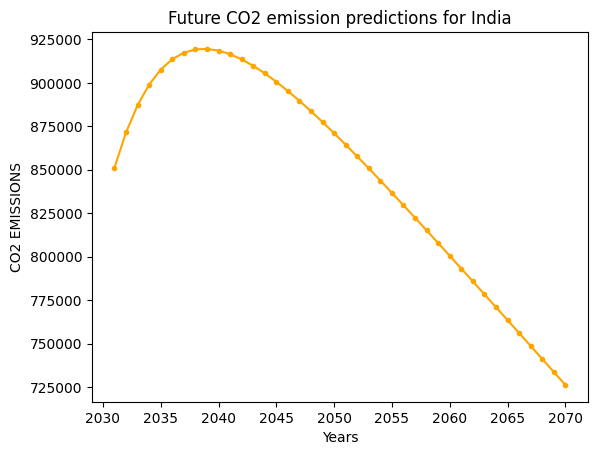

In [ ]:
plt.plot(future_co2_df.index,future_co2_df['carbon_forecast'],'orange',marker='o',ms=3)
plt.xlabel('Years')
plt.ylabel('CO2 EMISSIONS')
plt.title('Future CO2 emission predictions for India')

# 🌍 India's Path to Net Zero by 2070

## 📊 Key Observations from ARIMA Extrapolation  
According to our analysis using the **Kaya Identity** and **ARIMA-based forecasting**, India's **carbon emissions reach net zero by 2070** due to the following trends:  

1️⃣ **Slight Decline in GDP Growth (\(GDP/P\))**  
   - **Economic Maturity**: India transitions from an emerging to a **developed economy**, leading to slower but stable GDP growth.  
   - **Shift to Low-Carbon Sectors**:  
     - Service-based industries (IT, AI, finance) replace energy-intensive manufacturing.  
     - Digital transformation reduces the need for physical infrastructure expansion.  
   - **Aging Population Effects**: A lower birth rate leads to **reduced workforce growth**, naturally slowing GDP expansion.  

2️⃣ **Energy Intensity (\(E/GDP\)) Approaches Zero**  
   - **Massive Efficiency Gains**:  
     - **Full electrification** of transport, industry, and buildings eliminates energy waste.  
     - **AI & automation** optimize energy use, making industries hyper-efficient.  
   - **Renewable Energy Integration**:  
     - Smart grids + energy storage eliminate transmission losses.  
     - Decentralized solar + wind power reduces dependency on fossil fuels.  
   - **Circular Economy Adoption**:  
     - **Recycling & material innovation** lower energy demand for production.  

3️⃣ **Carbon Intensity (\(CO_2/E\)) Approaches Zero**  
   - **100% Renewable Energy Dominance**   
     - Solar, wind, hydro, and nuclear fully replace fossil fuels.  
   - **Carbon Capture & Negative Emissions**
     - Direct Air Capture & afforestation offset any residual emissions.  
   - **Hydrogen Economy**:  
     - Green hydrogen fuels heavy industry, reducing reliance on coal.  

4️⃣ **Population Stagnant or Slight Increase (\(P\))**  
   - **Demographic Stabilization**: India’s population peaks around 2060, then stabilizes.  
   - **Urbanization & Smart Cities**:  
     - High-efficiency urban planning **reduces per capita energy use**.  
     - Public transport & shared mobility replace individual vehicle ownership.  

## Therefore India’s transition is driven by **policy interventions, technological advancements, and economic evolution**, ensuring that **net zero is achieved by 2070**.


# **THANK YOU**